# <b>MA0218: Introduction to Data Science and Artificial Intelligence Mini Project</b>

<b> Group Member:</b>
1. Antonius Ivan Rahardja Setiawan (U2320164F)
2. Askana Mirza Maulana Irfany (U2320433A)
3. Theodore Amadeo Argasetya Atmadja (U2320581F)
4. Timothy Louis Barus (U2320344D)
---

## <b>A. Problem Introduction</b>

- **Title:**   
Predicting Tennis Match Outcomes Using Advanced Statistical Models   
- **Objective:**   
In professional tennis, predicting match outcomes can provide valuable insights for players, coaches, and sports analysts. However, the influence of different performance metrics—such as serve success, age, and ranking—on match results is complex and not fully understood. This dataset offers a comprehensive view of these variables across numerous matches, presenting an opportunity to <b><u>identify patterns that determine a player’s likelihood of winning.</u></b>
- **Motivation:**   
Tennis is a sport characterized by its unpredictability, where matches can swing in favor of one player or another based on numerous factors. Accurate prediction of match outcomes has significant implications for various stakeholders, including:   
**a. Coaching and Player Development:**   
Coaches and players can benefit from understanding which factors influence match outcomes. By analyzing data and trends, they can <i><u>develop better training programs, strategies, and mental preparation techniques tailored to upcoming opponents.</u></i>   
**b. Fan Engagement:**   
As fans become increasingly invested in the statistical side of sports, providing predictions based on data analytics can <i><u>enhance their engagement and enjoyment of the sport.</u></i>   
**c. Sport Analytics Growth:**
The growing field of sports analytics has opened doors for <i><u>using data-driven approaches to enhance performance and decision-making in sports.</u></i> Developing a robust model for predicting tennis match outcomes contributes to this trend and showcases the power of analytics in understanding complex sports dynamics.
- **Research Questions:**   
  1. What player statistics and match conditions are the most significant predictors of match outcomes in tennis?
  2. How can advanced statistical methods, such as machine learning algorithms and the Glicko-2 rating system, improve prediction accuracy compared to traditional models?
  3. Can the model be adapted to provide predictions for different types of tournaments and surfaces, considering their unique characteristics?

## <b>B. Data Preparation</b>
In this research, we will use the dataset provided by Jeff Sackmann, which can be download from <a href="https://github.com/JeffSackmann/tennis_atp" target="_blank">Github</a> since it provides a ton of match that happened from 1968 to 2024.   

Based on the description:
> From the dataset, important features may use:
- `surface`: Each surface will effect the movement of the ball, which may affect the match result
- `tourney_level`: Each tournament has their own prestigious, which give pressure to the player
- `winner_seed` and `loser_seed`: Higher rank player will have higher seed in the bracket
- `winner_hand` and `loser_hand`: Dominant hand used can be effect the characteristics of tennis stroke
- `score`: The result of the match
- `best_of`: Tournament usually use best-of-3, except for master and grand slams
- `minutes`: The duration of match will effect the level of fatigue
- `all of the statistics` : Every statistic will determine the player's ability in a match 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
import os

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Directory path where our CSV files are located
directory = r'C:\NTU\Semester 3\MA0218\dataset_final_project'

# Create an empty list to store DataFrames
data_frames = []

# Loop through all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
        data_frames.append(df)  # Add the DataFrame to the list

# Concatenate all DataFrames
combined_df = pd.concat(data_frames, ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
output_file = 'combined_file.csv'
combined_df.to_csv(output_file, index=False)

In [5]:
pd.set_option("display.max_columns", None)
df_used = pd.read_csv ("combined_file.csv")
df_used.tail(10)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
921311,2024-2869,Skopje CH,Clay,32,C,20240520,246,126627,NaN,PR,Johan Nikles,R,170.0,SUI,27.1,200385,2.0,NaN,Dan Added,U,NaN,FRA,25.1,W/O,3,Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,965.0,14.0,391.0,122.0
921312,2024-2869,Skopje CH,Clay,32,C,20240520,245,202146,NaN,NaN,Luka Pavlovic,U,NaN,FRA,24.1,108710,NaN,WC,Shendrit Deari,R,NaN,MKD,35.2,6-3 6-4,3,Q1,63.0,4.0,3.0,48.0,29.0,27.0,13.0,10.0,0.0,0.0,1.0,0.0,47.0,25.0,15.0,16.0,9.0,0.0,2.0,517.0,75.0,NaN,NaN
921313,2024-2869,Skopje CH,Clay,32,C,20240520,244,200672,NaN,NaN,Sergey Fomin,R,NaN,UZB,23.2,210178,3.0,NaN,Juan Carlos Prado Angelo,U,NaN,BOL,19.2,6-2 2-6 6-2,3,Q1,119.0,0.0,0.0,65.0,32.0,22.0,17.0,12.0,3.0,7.0,5.0,5.0,91.0,40.0,24.0,23.0,12.0,6.0,12.0,654.0,51.0,448.0,100.0
921314,2024-2869,Skopje CH,Clay,32,C,20240520,243,105589,7.0,NaN,Gerald Melzer,L,188.0,AUT,33.8,110748,NaN,PR,Nikola Milojevic,R,188.0,SRB,28.9,6-1 6-4,3,Q1,72.0,7.0,1.0,47.0,19.0,18.0,18.0,9.0,0.0,0.0,1.0,5.0,47.0,32.0,20.0,8.0,8.0,3.0,6.0,475.0,90.0,1073.0,10.0
921315,2024-2869,Skopje CH,Clay,32,C,20240520,242,207764,NaN,NaN,Ryan Nijboer,U,NaN,NED,24.8,126087,NaN,Alt,George Goldhoff,R,NaN,USA,29.3,6-3 6-2,3,Q1,74.0,4.0,2.0,52.0,35.0,26.0,11.0,8.0,3.0,3.0,5.0,7.0,55.0,28.0,17.0,12.0,9.0,6.0,10.0,428.0,108.0,1705.0,1.0
921316,2024-2869,Skopje CH,Clay,32,C,20240520,241,210053,8.0,NaN,Luka Mikrut,U,NaN,CRO,20.0,103872,NaN,WC,Dimitar Grabuloski,U,NaN,MKD,42.5,6-3 6-4,3,Q1,87.0,4.0,6.0,64.0,31.0,24.0,18.0,10.0,2.0,3.0,2.0,5.0,78.0,43.0,30.0,13.0,9.0,6.0,9.0,511.0,76.0,NaN,NaN
921317,2024-2869,Skopje CH,Clay,32,C,20240520,240,208843,5.0,NaN,Jerome Kym,R,198.0,SUI,21.2,210078,NaN,WC,Berk Bugarikj,U,NaN,MKD,20.8,7-5 6-0,3,Q1,77.0,5.0,0.0,44.0,29.0,25.0,9.0,9.0,1.0,2.0,0.0,3.0,60.0,41.0,21.0,8.0,9.0,2.0,7.0,470.0,92.0,NaN,NaN
921318,2024-2869,Skopje CH,Clay,32,C,20240520,239,207484,12.0,NaN,Neil Oberleitner,R,NaN,AUT,24.7,200574,NaN,Alt,Alexander Donski,R,188.0,CAN,25.8,6-4 6-3,3,Q1,82.0,5.0,5.0,54.0,33.0,27.0,13.0,9.0,2.0,2.0,4.0,6.0,72.0,34.0,26.0,15.0,10.0,3.0,6.0,636.0,53.0,955.0,15.0
921319,2024-2869,Skopje CH,Clay,32,C,20240520,238,144970,6.0,NaN,Constantin Bittoun Kouzmine,L,NaN,FRA,25.3,212200,NaN,WC,Amar Huseinovic,U,NaN,MKD,NaN,6-0 6-1,3,Q1,59.0,0.0,1.0,43.0,32.0,26.0,5.0,7.0,4.0,4.0,2.0,0.0,36.0,22.0,9.0,4.0,6.0,0.0,5.0,487.0,87.0,NaN,NaN
921320,2024-2869,Skopje CH,Clay,32,C,20240520,237,202342,NaN,NaN,Ryan Seggerman,U,NaN,USA,24.7,106254,NaN,Alt,Calum Puttergill,U,NaN,AUS,30.5,7-5 6-0,3,Q1,56.0,10.0,1.0,44.0,28.0,22.0,12.0,9.0,0.0,1.0,0.0,9.0,52.0,28.0,19.0,7.0,9.0,3.0,8.0,555.0,67.0,880.0,20.0


In [7]:
df_used.shape #Reviewing the initial dataset's dimensions

(921321, 49)

In [9]:
df_used.info () #Uncleaned Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921321 entries, 0 to 921320
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          921321 non-null  object 
 1   tourney_name        921321 non-null  object 
 2   surface             916692 non-null  object 
 3   draw_size           920486 non-null  object 
 4   tourney_level       921321 non-null  object 
 5   tourney_date        921321 non-null  int64  
 6   match_num           921321 non-null  int64  
 7   winner_id           921321 non-null  int64  
 8   winner_seed         390020 non-null  object 
 9   winner_entry        152107 non-null  object 
 10  winner_name         921321 non-null  object 
 11  winner_hand         901856 non-null  object 
 12  winner_ht           571805 non-null  float64
 13  winner_ioc          921248 non-null  object 
 14  winner_age          908185 non-null  float64
 15  loser_id            921321 non-nul

In [11]:
df_used['tourney_date'] = pd.to_datetime(df_used['tourney_date'], format='%Y%m%d') #Change the date format
df_used

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32.0,A,1968-07-08,270,112411,NaN,NaN,Doug Smith,U,NaN,AUS,NaN,110196,NaN,NaN,Peter Ledbetter,U,NaN,IRL,24.0,6-1 7-5,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32.0,A,1968-07-08,271,126914,NaN,NaN,Louis Pretorius,R,NaN,RSA,NaN,209536,NaN,NaN,Maurice Pollock,U,NaN,IRL,NaN,6-1 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32.0,A,1968-07-08,272,209523,NaN,NaN,Cecil Pedlow,U,NaN,IRL,NaN,209535,NaN,NaN,John Mulvey,U,NaN,IRL,NaN,6-2 6-2,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32.0,A,1968-07-08,273,100084,NaN,NaN,Tom Okker,R,178.0,NED,24.3,209534,NaN,NaN,Unknown Fearmon,U,NaN,NaN,NaN,6-1 6-1,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32.0,A,1968-07-08,274,100132,NaN,NaN,Armistead Neely,R,NaN,USA,21.3,209533,NaN,NaN,Harry Sheridan,U,NaN,IRL,NaN,6-2 6-4,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921316,2024-2869,Skopje CH,Clay,32,C,2024-05-20,241,210053,8.0,NaN,Luka Mikrut,U,NaN,CRO,20.0,103872,NaN,WC,Dimitar Grabuloski,U,NaN,MKD,42.5,6-3 6-4,3,Q1,87.0,4.0,6.0,64.0,31.0,24.0,18.0,10.0,2.0,3.0,2.0,5.0,78.0,43.0,30.0,13.0,9.0,6.0,9.0,511.0,76.0,NaN,NaN
921317,2024-2869,Skopje CH,Clay,32,C,2024-05-20,240,208843,5.0,NaN,Jerome Kym,R,198.0,SUI,21.2,210078,NaN,WC,Berk Bugarikj,U,NaN,MKD,20.8,7-5 6-0,3,Q1,77.0,5.0,0.0,44.0,29.0,25.0,9.0,9.0,1.0,2.0,0.0,3.0,60.0,41.0,21.0,8.0,9.0,2.0,7.0,470.0,92.0,NaN,NaN
921318,2024-2869,Skopje CH,Clay,32,C,2024-05-20,239,207484,12.0,NaN,Neil Oberleitner,R,NaN,AUT,24.7,200574,NaN,Alt,Alexander Donski,R,188.0,CAN,25.8,6-4 6-3,3,Q1,82.0,5.0,5.0,54.0,33.0,27.0,13.0,9.0,2.0,2.0,4.0,6.0,72.0,34.0,26.0,15.0,10.0,3.0,6.0,636.0,53.0,955.0,15.0
921319,2024-2869,Skopje CH,Clay,32,C,2024-05-20,238,144970,6.0,NaN,Constantin Bittoun Kouzmine,L,NaN,FRA,25.3,212200,NaN,WC,Amar Huseinovic,U,NaN,MKD,NaN,6-0 6-1,3,Q1,59.0,0.0,1.0,43.0,32.0,26.0,5.0,7.0,4.0,4.0,2.0,0.0,36.0,22.0,9.0,4.0,6.0,0.0,5.0,487.0,87.0,NaN,NaN


In [13]:
# Identifying null values in the dataset
print ("Number of null values per column:\n", df_used.isnull ().sum())

Number of null values per column:
 tourney_id                 0
tourney_name               0
surface                 4629
draw_size                835
tourney_level              0
tourney_date               0
match_num                  0
winner_id                  0
winner_seed           531301
winner_entry          769214
winner_name                0
winner_hand            19465
winner_ht             349516
winner_ioc                73
winner_age             13136
loser_id                   0
loser_seed            721346
loser_entry           651572
loser_name                 0
loser_hand             21061
loser_ht              461489
loser_ioc                134
loser_age              28512
score                    154
best_of                    0
round                      0
minutes               721993
w_ace                 715461
w_df                  715462
w_svpt                715462
w_1stIn               715462
w_1stWon              715462
w_2ndWon              715462
w_SvGms 

In [15]:
# Identifying missing values in the dataset
print ("Number of missing values per column:\n", df_used.isna().sum())

Number of missing values per column:
 tourney_id                 0
tourney_name               0
surface                 4629
draw_size                835
tourney_level              0
tourney_date               0
match_num                  0
winner_id                  0
winner_seed           531301
winner_entry          769214
winner_name                0
winner_hand            19465
winner_ht             349516
winner_ioc                73
winner_age             13136
loser_id                   0
loser_seed            721346
loser_entry           651572
loser_name                 0
loser_hand             21061
loser_ht              461489
loser_ioc                134
loser_age              28512
score                    154
best_of                    0
round                      0
minutes               721993
w_ace                 715461
w_df                  715462
w_svpt                715462
w_1stIn               715462
w_1stWon              715462
w_2ndWon              715462
w_SvG

In [17]:
# Identifying duplicate values in the dataset
print ("Number of duplicate values:\n", df_used.duplicated().sum())

Number of duplicate values:
 0


Here, we know that the dataset must be cleaned first before proceed into the analyzing correlation process. 

In [19]:
# Remove columns which are not effecting the match outcome. 
df_used.drop(columns=["draw_size", "match_num", "winner_entry", "winner_ht", "loser_entry", "loser_ht", "minutes", "winner_rank","winner_rank_points","loser_rank","loser_rank_points"], inplace= True)

In [21]:
df_used.dropna(subset=["surface", "winner_hand", "winner_ioc", "winner_age", "loser_hand", "loser_ioc", "loser_age", "w_SvGms", "w_ace"], inplace=True)

In [23]:
df_used["winner_seed"].fillna(0, inplace=True)
df_used["loser_seed"].fillna(0, inplace=True)

In [25]:
df_used = df_used[~df_used['score'].str.contains('RET')] #Drop the score's columns that contain word "RET"

In [27]:
df_used = df_used[~df_used['score'].str.contains('W/O')] #Drop the score's columns that contain word "W/O"

In [29]:
df_used.info() #Clean dataset

<class 'pandas.core.frame.DataFrame'>
Index: 199161 entries, 86621 to 921320
Data columns (total 38 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   tourney_id     199161 non-null  object        
 1   tourney_name   199161 non-null  object        
 2   surface        199161 non-null  object        
 3   tourney_level  199161 non-null  object        
 4   tourney_date   199161 non-null  datetime64[ns]
 5   winner_id      199161 non-null  int64         
 6   winner_seed    199161 non-null  object        
 7   winner_name    199161 non-null  object        
 8   winner_hand    199161 non-null  object        
 9   winner_ioc     199161 non-null  object        
 10  winner_age     199161 non-null  float64       
 11  loser_id       199161 non-null  int64         
 12  loser_seed     199161 non-null  object        
 13  loser_name     199161 non-null  object        
 14  loser_hand     199161 non-null  object        
 15  l

In [31]:
df_used.sample(10)

,tourney_id,tourney_name,surface,tourney_level,tourney_date,winner_id,winner_seed,winner_name,winner_hand,winner_ioc,winner_age,loser_id,loser_seed,loser_name,loser_hand,loser_ioc,loser_age,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
832708,2013-670,Binghamton CH,Hard,C,2013-07-15,105572,0,Austin Krajicek,L,USA,23.0,104291,7.0,Malek Jaziri,R,TUN,29.4,6-4 2-6 7-5,3,R16,4.0,2.0,84.0,55.0,40.0,16.0,15.0,4.0,7.0,4.0,9.0,89.0,38.0,30.0,27.0,15.0,4.0,7.0
161994,2013-424,San Jose,Hard,A,2013-02-11,105023,3.0,Sam Querrey,R,USA,25.3,103720,0,Lleyton Hewitt,R,AUS,31.9,7-6(6) 1-6 7-6(4),3,R16,20.0,2.0,107.0,66.0,49.0,22.0,15.0,7.0,10.0,10.0,4.0,109.0,67.0,50.0,25.0,16.0,2.0,3.0
864228,2017-7397,Kobe CH,Hard,C,2017-11-06,105051,3.0,Matthew Ebden,R,AUS,29.9,105655,0,Hiroki Moriya,R,JPN,27.0,4-6 6-4 7-5,3,R32,8.0,2.0,100.0,64.0,46.0,17.0,16.0,4.0,7.0,4.0,5.0,102.0,60.0,42.0,20.0,16.0,6.0,10.0
820145,2011-6286,Nottingham2 CH,Hard,C,2011-06-06,104534,2.0,Dudi Sela,R,ISR,26.1,104770,0,Martin Fischer,R,AUT,24.8,6-4 6-3,3,R32,1.0,1.0,54.0,35.0,27.0,12.0,10.0,0.0,1.0,1.0,2.0,82.0,56.0,29.0,16.0,9.0,13.0,16.0
854566,2016-7293,Manchester CH,Grass,C,2016-05-30,104594,5.0,Marinko Matosevic,R,AUS,30.7,111451,0,Bradley Mousley,U,AUS,20.3,7-5 6-2,3,Q3,5.0,1.0,60.0,33.0,22.0,21.0,10.0,3.0,4.0,2.0,3.0,70.0,39.0,26.0,14.0,10.0,5.0,9.0
131668,2003-439,Umag,Clay,A,2003-07-21,102845,1.0,Carlos Moya,R,ESP,26.8,103970,8.0,David Ferrer,R,ESP,21.3,6-1 6-2,3,QF,5.0,1.0,49.0,24.0,19.0,13.0,7.0,3.0,3.0,0.0,8.0,58.0,28.0,14.0,13.0,8.0,6.0,11.0
878720,2019-2278,Taipei CH,Hard,C,2019-04-08,111794,6.0,Kamil Majchrzak,R,POL,23.2,117361,0,Akira Santillan,R,AUS,21.8,6-3 6-1,3,R32,8.0,2.0,44.0,25.0,22.0,11.0,8.0,0.0,0.0,4.0,1.0,48.0,26.0,17.0,8.0,8.0,3.0,7.0
829859,2013-429,Stockholm,Hard,A,2013-10-14,105113,0,Patrik Rosenholm,R,SWE,25.6,105383,0,Dennis Bloemke,R,GER,24.2,6-4 6-2,3,Q1,1.0,2.0,46.0,26.0,24.0,14.0,9.0,1.0,1.0,0.0,3.0,51.0,22.0,13.0,17.0,9.0,0.0,3.0
171984,2016-540,Wimbledon,Grass,G,2016-06-27,105227,9.0,Marin Cilic,R,CRO,27.7,104660,0,Sergiy Stakhovsky,R,UKR,30.4,6-2 6-7(6) 6-4 6-4,5,R64,22.0,1.0,113.0,65.0,57.0,29.0,20.0,2.0,3.0,7.0,8.0,142.0,81.0,55.0,32.0,20.0,8.0,13.0
921315,2024-2869,Skopje CH,Clay,C,2024-05-20,207764,0,Ryan Nijboer,U,NED,24.8,126087,0,George Goldhoff,R,USA,29.3,6-3 6-2,3,Q1,4.0,2.0,52.0,35.0,26.0,11.0,8.0,3.0,3.0,5.0,7.0,55.0,28.0,17.0,12.0,9.0,6.0,10.0


In [33]:
# Assuming tennisData is your original DataFrame
df = df_used[['tourney_id', 'tourney_name', 'surface', 'tourney_level', 'tourney_date','winner_id', 'winner_age', 'winner_hand', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn','w_1stWon','w_2ndWon','w_SvGms','w_bpSaved','w_bpFaced',
                 'loser_id', 'loser_age', 'loser_hand', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn','l_1stWon','l_2ndWon',	'l_SvGms','l_bpSaved','l_bpFaced'
                ]].copy()

# Rename columns for clarity
df = df.rename(columns={
    'tourney_id':'match_id','winner_id': 'p1_id', 'winner_age': 'p1_age', 'winner_hand': 'p1_hand', 'w_ace': 'p1_ace', 
    'w_df': 'p1_df', 'w_svpt': 'p1_svpt', 'w_1stIn' : 'p1_1stIn','w_1stWon' : 'p1_1stWon','w_2ndWon' : 'p1_2ndWon','w_SvGms' :'p1_SvGms','w_bpSaved' :'p1_bpSaved' ,'w_bpFaced':'p1_bpFaced',
    'loser_id': 'p2_id', 'loser_age': 'p2_age', 'loser_hand': 'p2_hand', 'l_ace': 'p2_ace', 
    'l_df': 'p2_df', 'l_svpt': 'p2_svpt', 'l_1stIn':'p2_1stIn' ,'l_1stWon':'p2_1stWon','l_2ndWon':'p2_2ndWon','l_SvGms':'p2_SvGms','l_bpSaved':"p2_bpSaved",'l_bpFaced' : 'p2_bpFaced',
})

# Add a target label (1 if Player 1 won, 0 if Player 2 won)
df['outcome'] = (df['p1_id'] == df_used['winner_id']).astype(int)

df.head(5)


,match_id,tourney_name,surface,tourney_level,tourney_date,p1_id,p1_age,p1_hand,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_SvGms,p1_bpSaved,p1_bpFaced,p2_id,p2_age,p2_hand,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_SvGms,p2_bpSaved,p2_bpFaced,outcome
86621,1991-339,Adelaide,Hard,A,1990-12-31,101723,20.7,R,6.0,2.0,96.0,55.0,39.0,25.0,15.0,2.0,4.0,101414,23.1,R,8.0,3.0,95.0,62.0,44.0,23.0,16.0,6.0,8.0,1
86622,1991-339,Adelaide,Hard,A,1990-12-31,100946,27.4,R,19.0,4.0,101.0,56.0,45.0,25.0,15.0,9.0,10.0,101256,24.6,L,8.0,2.0,84.0,41.0,35.0,27.0,15.0,1.0,2.0,1
86623,1991-339,Adelaide,Hard,A,1990-12-31,101234,24.8,R,6.0,1.0,54.0,31.0,24.0,13.0,8.0,1.0,1.0,101421,23.0,R,2.0,2.0,60.0,37.0,22.0,6.0,8.0,4.0,8.0,1
86624,1991-339,Adelaide,Hard,A,1990-12-31,101889,19.7,R,2.0,0.0,60.0,40.0,30.0,14.0,9.0,3.0,3.0,101703,20.8,R,3.0,3.0,74.0,45.0,30.0,11.0,10.0,5.0,8.0,1
86625,1991-339,Adelaide,Hard,A,1990-12-31,101274,24.4,R,4.0,2.0,72.0,40.0,33.0,14.0,10.0,7.0,8.0,101843,19.9,R,2.0,2.0,77.0,41.0,28.0,15.0,11.0,4.0,8.0,1


In [35]:
# Step 1: Shuffle player positions in the dataset to avoid positional bias
def randomize_player_positions(df):
    dfr = df.copy()  # Work on a copy of the DataFrame to avoid modifying the original

    # Generate a boolean array where True means swap players
    swap_mask = np.random.rand(len(dfr)) > 0.5

    # Swap columns based on the mask
    dfr.loc[swap_mask, ['p1_id', 'p2_id']] = dfr.loc[swap_mask, ['p2_id', 'p1_id']].values
    dfr.loc[swap_mask, ['p1_age', 'p2_age']] = dfr.loc[swap_mask, ['p2_age', 'p1_age']].values
    dfr.loc[swap_mask, ['p1_df', 'p2_df']] = dfr.loc[swap_mask, ['p2_df', 'p1_df']].values
    dfr.loc[swap_mask, ['p1_ace', 'p2_ace']] = dfr.loc[swap_mask, ['p2_ace', 'p1_ace']].values
    dfr.loc[swap_mask, ['p1_svpt', 'p2_svpt']] = dfr.loc[swap_mask, ['p2_svpt', 'p1_svpt']].values
    dfr.loc[swap_mask, ['p1_1stIn', 'p2_1stIn']] = dfr.loc[swap_mask, ['p2_1stIn', 'p1_1stIn']].values
    dfr.loc[swap_mask, ['p1_1stWon', 'p2_1stWon']] = dfr.loc[swap_mask, ['p2_1stWon', 'p1_1stWon']].values
    dfr.loc[swap_mask, ['p1_2ndWon', 'p2_2ndWon']] = dfr.loc[swap_mask, ['p2_2ndWon', 'p1_2ndWon']].values
    dfr.loc[swap_mask, ['p1_SvGms', 'p2_SvGms']] = dfr.loc[swap_mask, ['p2_SvGms', 'p1_SvGms']].values
    dfr.loc[swap_mask, ['p1_bpSaved', 'p2_bpSaved']] = dfr.loc[swap_mask, ['p2_bpSaved', 'p1_bpSaved']].values
    dfr.loc[swap_mask, ['p1_bpFaced', 'p2_bpFaced']] = dfr.loc[swap_mask, ['p2_bpFaced', 'p1_bpFaced']].values

    # Update the outcome label accordingly
    dfr.loc[swap_mask, 'outcome'] = 1 - dfr.loc[swap_mask, 'outcome']
    
    return dfr

# Apply randomization to the training data
df = randomize_player_positions(df)

# Verify that match_id is intact
print(df[['p1_id', 'p2_id', 'outcome']].head(4))

        p1_id   p2_id  outcome
86621  101723  101414        1
86622  100946  101256        1
86623  101421  101234        0
86624  101703  101889        0


In [37]:
print (df["outcome"].unique())

[1 0]


In [39]:
df.sample (10)

,match_id,tourney_name,surface,tourney_level,tourney_date,p1_id,p1_age,p1_hand,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_SvGms,p1_bpSaved,p1_bpFaced,p2_id,p2_age,p2_hand,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_SvGms,p2_bpSaved,p2_bpFaced,outcome
860623,2017-5016,Floridablanca CH,Clay,C,2017-08-07,105550,27.2,L,4.0,0.0,53.0,39.0,24.0,10.0,9.0,1.0,2.0,105671,26.7,R,2.0,4.0,49.0,23.0,15.0,11.0,9.0,2.0,6.0,1
857959,2017-0421,Canada Masters,Hard,M,2017-08-07,104672,31.5,L,0.0,1.0,65.0,45.0,33.0,12.0,10.0,6.0,7.0,106290,23.5,R,6.0,3.0,59.0,35.0,24.0,8.0,9.0,2.0,5.0,1
98882,1994-403,Miami Masters,Hard,M,1994-03-07,101727,23.9,R,3.0,3.0,67.0,38.0,23.0,13.0,10.0,2.0,6.0,101222,28.1,R,2.0,2.0,72.0,50.0,33.0,11.0,9.0,2.0,3.0,0
124695,2001-416,Rome Masters,Clay,M,2001-05-07,102783,25.0,L,0.0,1.0,53.0,35.0,17.0,7.0,8.0,4.0,9.0,101532,32.5,R,2.0,1.0,42.0,36.0,27.0,4.0,7.0,2.0,2.0,0
855941,2016-7490,Gwangju CH,Hard,C,2016-04-11,105965,24.0,R,1.0,1.0,55.0,30.0,16.0,13.0,9.0,4.0,8.0,105147,27.8,R,3.0,6.0,58.0,29.0,21.0,18.0,9.0,2.0,3.0,0
920048,2024-8388,Split CH,Clay,C,2024-04-08,105060,36.2,R,1.0,1.0,43.0,30.0,14.0,2.0,7.0,2.0,8.0,208071,24.0,R,2.0,1.0,40.0,24.0,17.0,9.0,7.0,2.0,3.0,0
128520,2002-451,Doha,Hard,A,2001-12-31,102783,25.6,R,5.0,1.0,48.0,27.0,21.0,16.0,9.0,2.0,2.0,103813,20.4,L,3.0,2.0,44.0,26.0,18.0,8.0,8.0,0.0,3.0,1
164867,2014-2276,Zagreb,Hard,A,2014-02-03,105526,23.7,R,5.0,5.0,62.0,34.0,22.0,16.0,10.0,1.0,4.0,105041,26.2,R,10.0,1.0,50.0,32.0,27.0,10.0,10.0,0.0,1.0,0
916744,2023-9817,Roseto Degli Abruzzi CH,Clay,C,2023-04-16,207494,20.5,R,0.0,3.0,64.0,43.0,27.0,9.0,10.0,4.0,7.0,207411,22.8,R,1.0,3.0,80.0,45.0,23.0,18.0,10.0,6.0,11.0,1
87803,1991-410,Monte Carlo Masters,Clay,M,1991-04-22,101098,26.2,L,3.0,1.0,65.0,40.0,29.0,13.0,11.0,2.0,4.0,101235,25.1,R,2.0,1.0,68.0,38.0,23.0,14.0,11.0,0.0,4.0,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199161 entries, 86621 to 921320
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   match_id       199161 non-null  object        
 1   tourney_name   199161 non-null  object        
 2   surface        199161 non-null  object        
 3   tourney_level  199161 non-null  object        
 4   tourney_date   199161 non-null  datetime64[ns]
 5   p1_id          199161 non-null  int64         
 6   p1_age         199161 non-null  float64       
 7   p1_hand        199161 non-null  object        
 8   p1_ace         199161 non-null  float64       
 9   p1_df          199161 non-null  float64       
 10  p1_svpt        199161 non-null  float64       
 11  p1_1stIn       199161 non-null  float64       
 12  p1_1stWon      199161 non-null  float64       
 13  p1_2ndWon      199161 non-null  float64       
 14  p1_SvGms       199161 non-null  float64       
 15  p

In [43]:
df.to_csv("data_used.csv", index = False)

Therefore, we got out cleaned dataset that we will use along this project.

<b>Correlation Analysis between "outcome" and Other Features</b>   
Calculates the Pearson correlation coefficients between the 'outcome' column and all other columns in the dataframe, providing insights into the linear relationships between 'outcome' and each feature.

In [45]:
df_numerical = df[["p1_age", "p1_ace", "p1_df", "p1_svpt", "p1_1stIn", "p1_1stWon", "p1_2ndWon", "p1_SvGms", "p1_bpSaved", "p1_bpFaced", "p2_age", "p2_ace", "p2_df", "p2_svpt", "p2_1stIn", "p2_1stWon", "p2_2ndWon", "p2_SvGms", "p2_bpSaved", "p2_bpFaced", "outcome"]]
df_numerical.corr()["outcome"]

p1_age        0.012110
p1_ace        0.162447
p1_df        -0.158609
p1_svpt      -0.053275
p1_1stIn     -0.013216
p1_1stWon     0.157577
p1_2ndWon     0.132743
p1_SvGms      0.024338
p1_bpSaved   -0.199549
p1_bpFaced   -0.416065
p2_age       -0.010816
p2_ace       -0.164265
p2_df         0.157242
p2_svpt       0.048813
p2_1stIn      0.008710
p2_1stWon    -0.161513
p2_2ndWon    -0.135667
p2_SvGms     -0.028132
p2_bpSaved    0.192990
p2_bpFaced    0.411360
outcome       1.000000
Name: outcome, dtype: float64

To explore non-linear relationships between features and the target variable, we will use Spearman's rank correlation, which assesses how well the relationship between two variables can be described using a monotonic function.

In [47]:
# Calculating Spearman's Rank Correlation
spearman_corr = df_numerical.corr(method='spearman')['outcome'].sort_values(ascending=False)

# Displaying the Spearman's Rank Correlation
print("Spearman's Rank Correlation with Tennis Match Outcome:")
print(spearman_corr)

Spearman's Rank Correlation with Tennis Match Outcome:
outcome       1.000000
p2_bpFaced    0.442501
p2_bpSaved    0.212905
p1_ace        0.187836
p1_1stWon     0.179125
p2_df         0.169610
p1_2ndWon     0.146557
p2_svpt       0.056825
p1_SvGms      0.032539
p1_age        0.011846
p2_1stIn      0.011732
p2_age       -0.010950
p1_1stIn     -0.014710
p2_SvGms     -0.036584
p1_svpt      -0.061489
p2_2ndWon    -0.150832
p1_df        -0.171603
p2_1stWon    -0.182472
p2_ace       -0.188156
p1_bpSaved   -0.220035
p1_bpFaced   -0.447760
Name: outcome, dtype: float64


## <b>B. Exploratory Data Analysis (EDA)</b>
EDA is a critical step in understanding the dataset deeply, revealing patterns, anomalies, and correlations through visual and statistical analysis. This thorough examination helps in identifying significant predictors for tennis match outcome, guiding the subsequent modeling efforts with informed decisions.

##### Breaking Down Outcome: First Player Won or Second Player Won

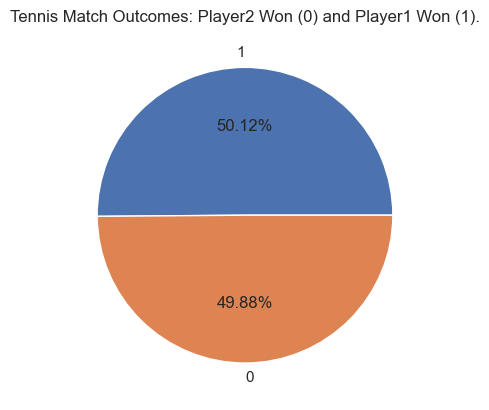

In [53]:
categories_counts = df['outcome'].value_counts()
plt.pie(categories_counts.values, labels=categories_counts.index, autopct='%1.2f%%')

plt.title('Tennis Match Outcomes: Player2 Won (0) and Player1 Won (1).')
plt.show()

This pie chart illustrates the distribution of match outcome in the dataset. It shows that both match outcome have the same proportion, highlighting the balance of dataset.

##### Comprehensive Analysis of Predictors Influencing Match Outcome
This section conducts an in-depth analysis of various factors to understand their influence on match outcome:
- Correlation matrix heatmaps explain the complex relationships between various variables.
- Correlation matrix heatmaps for surface to explain the effect of surface to the match statistics.
- Correlation matrix heatmaps for tournament level to explain the effect of pressure given from prestigious tournament to the match statistics.
  
Collectively, these visual analysis tools create a powerful narrative about the main factor to win a tennis match.

### Seeing the overall relationship among the variables

In [55]:
df_numerical.describe()

,p1_age,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_SvGms,p1_bpSaved,p1_bpFaced,p2_age,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_SvGms,p2_bpSaved,p2_bpFaced,outcome
count,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000,199161.000000
mean,25.760653,5.009038,3.049101,75.628306,45.868744,32.096520,14.834757,11.680967,4.046987,6.822305,25.771949,4.981161,3.054935,75.692214,45.903194,32.088461,14.838161,11.680716,4.072359,6.857156,0.501243
std,4.047603,4.553696,2.413764,25.627971,16.917126,12.489495,6.466882,3.564753,3.114059,4.246967,4.044581,4.523935,2.419954,25.655949,16.932697,12.499076,6.474832,3.567307,3.110666,4.240075,0.500000
min,14.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,14.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.800000,2.000000,1.000000,56.000000,34.000000,23.000000,10.000000,9.000000,2.000000,4.000000,22.800000,2.000000,1.000000,56.000000,34.000000,23.000000,10.000000,9.000000,2.000000,4.000000,0.000000
50%,25.500000,4.000000,3.000000,71.000000,43.000000,30.000000,14.000000,11.000000,4.000000,6.000000,25.500000,4.000000,3.000000,71.000000,43.000000,30.000000,14.000000,11.000000,4.000000,6.000000,1.000000
75%,28.400000,7.000000,4.000000,91.000000,55.000000,39.000000,19.000000,14.000000,6.000000,9.000000,28.400000,7.000000,4.000000,91.000000,55.000000,39.000000,18.000000,14.000000,6.000000,9.000000,1.000000
max,48.900000,103.000000,26.000000,489.000000,328.000000,284.000000,101.000000,91.000000,28.000000,35.000000,53.900000,113.000000,26.000000,491.000000,361.000000,292.000000,82.000000,90.000000,27.000000,38.000000,1.000000


<Axes: >

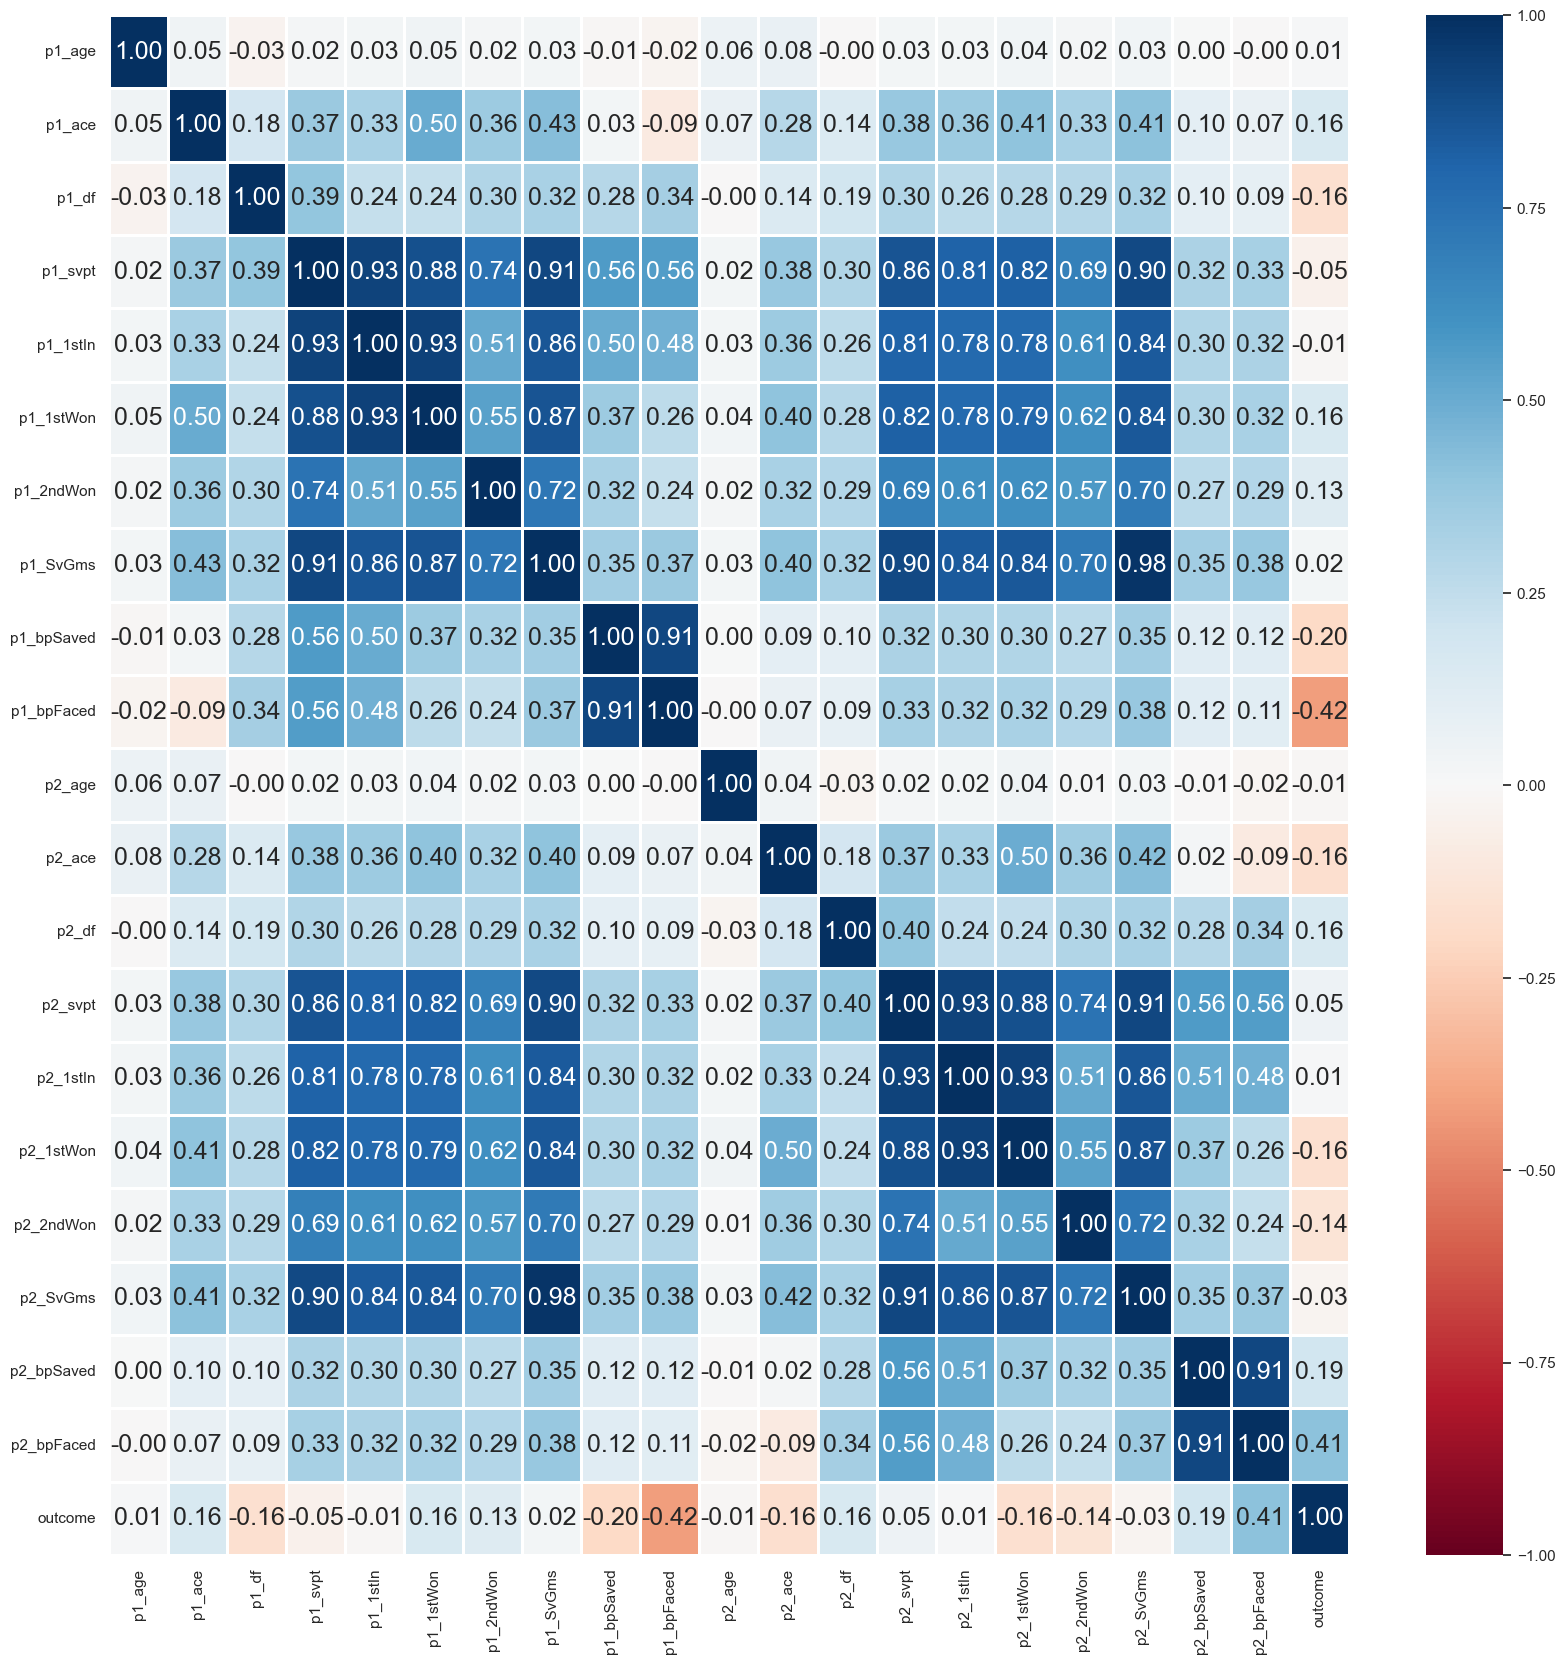

In [57]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(df_numerical.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

**Which variables has the highest correlation with the outcome?**     

Based on the heatmap shown above, we can take hypothesis that **ace** (p1_ace & p2_ace), **double fault** (p1_df & p2_df), **first-serve point won** (p1_1stWon & p2_1stWon), **second-serve point won** (p1_2ndWon & p2_2ndWon), **break point saved** (p1_bpSaved & p2_bpSaved), and **break point faced** (p1_bpFaced & p2_bpFaced) for both players are the importance aspect for winning a tennis match. Even though, we already have this hypothesis, it doesn't mean that we can ignore the rest of statistics because every statistics have impact in controlling the momentum of match. Hence, we will still account for every statistics to get the best result.

In [59]:
Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)
IQR = Q3 - Q1

((df_numerical < (Q1 - 1.5 * IQR)) | (df_numerical > (Q3 + 1.5 * IQR))).sum()

p1_age        1130
p1_ace        8407
p1_df         6332
p1_svpt       3740
p1_1stIn      4790
p1_1stWon     4101
p1_2ndWon     2784
p1_SvGms      4113
p1_bpSaved    3089
p1_bpFaced    4713
p2_age        1171
p2_ace        8156
p2_df         6325
p2_svpt       3744
p2_1stIn      4794
p2_1stWon     4068
p2_2ndWon     4266
p2_SvGms      4128
p2_bpSaved    3130
p2_bpFaced    4585
outcome          0
dtype: int64

**Do we need to remove the outliers from the dataset?**     

All of the statistics above is **important** in predicting the match outcome, even thought it is an outlier. The reason is because upsets and surprising results are part of tennis, and keeping outliers could be valuable. They may represent rare but crucial events that affect match outcomes. Outliers in this data could indicate an unexpected but valid pattern, such as an underdog winning due to specific factors (e.g., serving statistics or unforced errors by the favorite).

### See the surface effect to the match statistics

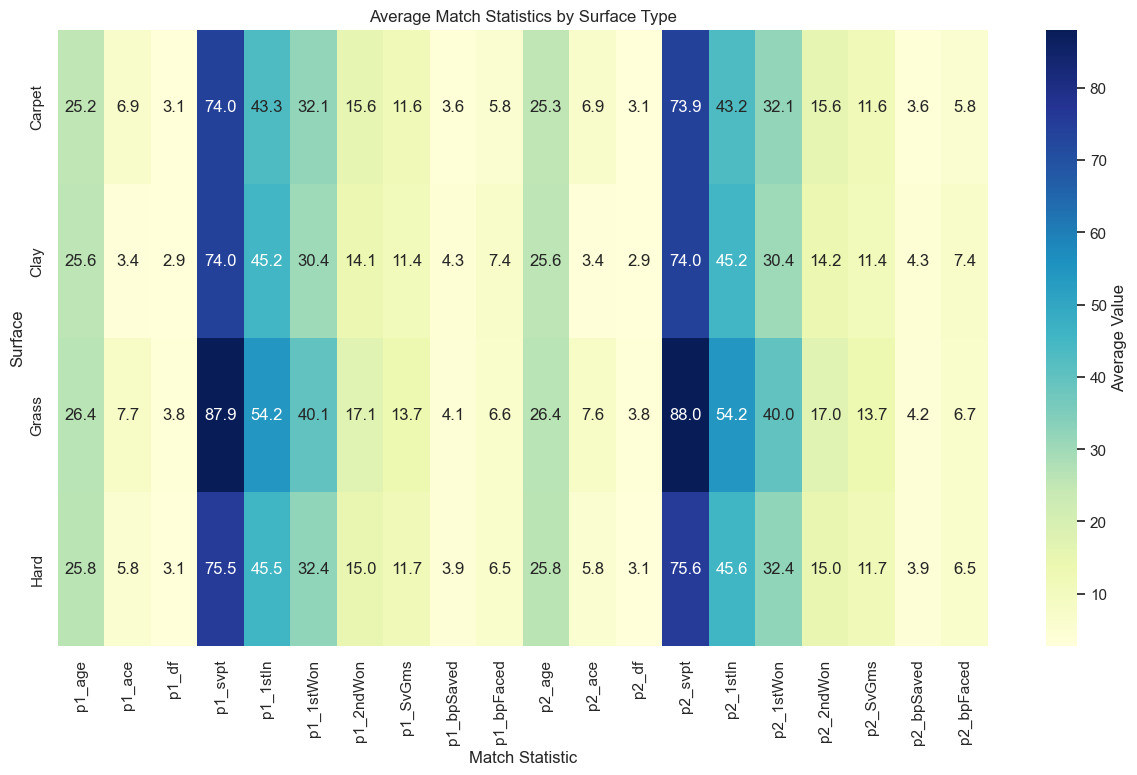

In [61]:
# Include "surface" as an additional column for grouping
df_plus_surface = df[["surface", "p1_age", "p1_ace", "p1_df", "p1_svpt", "p1_1stIn", "p1_1stWon", "p1_2ndWon", "p1_SvGms", "p1_bpSaved", "p1_bpFaced", "p2_age", "p2_ace", "p2_df", "p2_svpt", "p2_1stIn", "p2_1stWon", "p2_2ndWon", "p2_SvGms", "p2_bpSaved", "p2_bpFaced"]]

# Now, group by "surface" and calculate the mean of each numeric column
df_corr_surface = df_plus_surface.groupby("surface").mean()

plt.figure(figsize=(15, 8))
sb.heatmap(df_corr_surface, annot=True, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Average Value'})

plt.title("Average Match Statistics by Surface Type")
plt.ylabel("Surface")
plt.xlabel("Match Statistic")
plt.show()

**Is the court surface will effect the match statistics?**     

Based on the heatmap above, we can conclude that the surface court **plays such a significant role** in tennis match. It is because each court has its own characteristics in bouncing the tennis ball and restrict player movement. 
| Tennis Court Surface  | Hard | Grass | Carpet | Clay |
|-----------------------|------|-------|--------|------|
| **Ball Speed**        |  Fast    | Fast      |    Fast    |   Slow   |
| **Ball Bounce**       |  High    | Low      |      Low  |     High |


### See the tournament level (prestige) effect to the match statistics

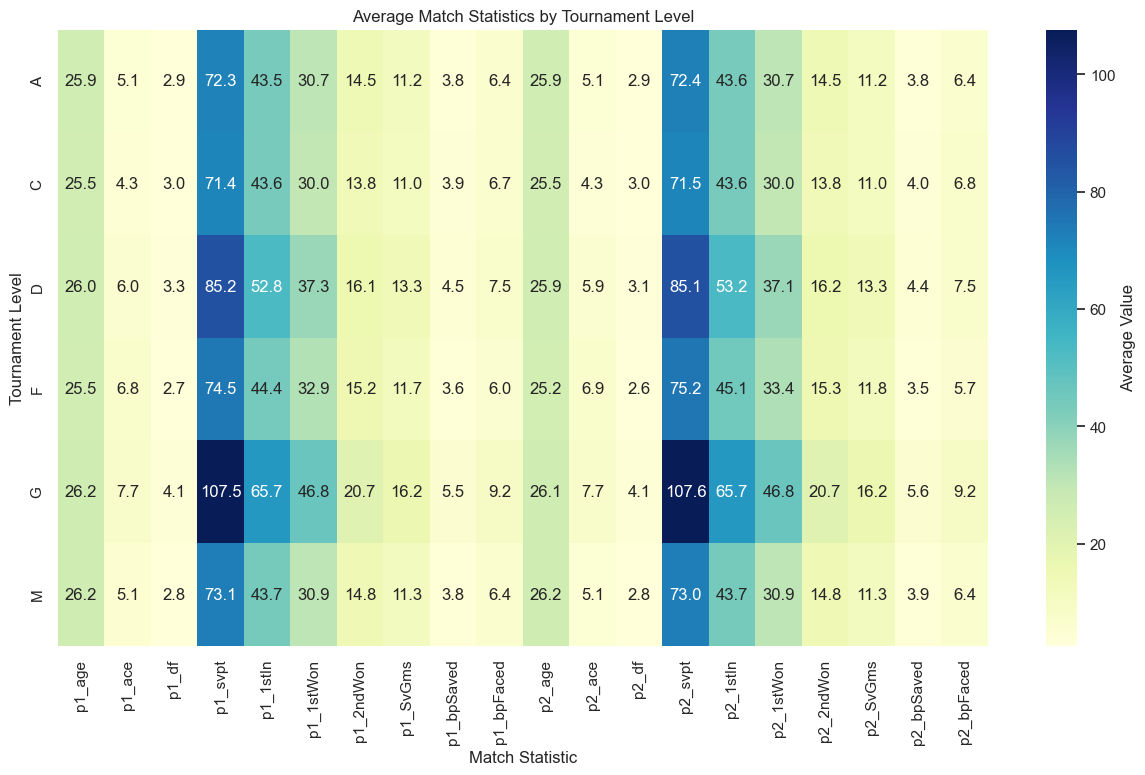

In [63]:
# Include "surface" as an additional column for grouping
df_plus_tourney_level = df[["tourney_level", "p1_age", "p1_ace", "p1_df", "p1_svpt", "p1_1stIn", "p1_1stWon", "p1_2ndWon", "p1_SvGms", "p1_bpSaved", "p1_bpFaced", "p2_age", "p2_ace", "p2_df", "p2_svpt", "p2_1stIn", "p2_1stWon", "p2_2ndWon", "p2_SvGms", "p2_bpSaved", "p2_bpFaced"]]

# Now, group by "surface" and calculate the mean of each numeric column
df_corr_tournament_level = df_plus_tourney_level.groupby("tourney_level").mean()

plt.figure(figsize=(15, 8))
sb.heatmap(df_corr_tournament_level, annot=True, cmap="YlGnBu", fmt=".1f", cbar_kws={'label': 'Average Value'})

plt.title("Average Match Statistics by Tournament Level")
plt.ylabel("Tournament Level")
plt.xlabel("Match Statistic")
plt.show()

**Is the tournament level give pressure to the player and affecting the match statistics?**     

Based on the heatmap above, we can conclude that tournament prestige really give pressure for the player since the point rewarded for the winner is different for each tournament level. So that, each player eager to win the most prestigious tournament.  

## <b>C. Glicko-2 Rating System</b>
Glicko-2 rating system is an improvement over the original <b>Glicko</b> rating system, both developed by <b>Mark Glickmann</b>. Initially, this rating system is made to rate players or participants in competitive games or sports, similar to the Elo system with some key differences that make Glicko-2 more flexible and accurate. Therefore, <b>Glicko-2 Rating System</b> is such a good system used for dynamic ranking environments.

> Key Features of Glicko-2 Rating System:
1. `Rating`: Glicko-2 assigns each player a rating to represent their skill level. Higher numbers represent better players.
2. `Rating Deviation (RD)`: Glicko-2 accounts for the uncertainty in a player's rating. RD represents how sure the system is about a player's rating. A lower RD means the system is more confident about the rating, while a higher RD indicates uncertainty (often due to inactivity or inconsistent performance).
3. `Volatility`: Glicko-2 rating system measures how consistent a player's performance is. A high volatility means a player's rating is likely to fluctuate more due to varying performance levels, while a low volatility means the player is more predictable.
4. `Time Sensitivity`: Glicko-2 updates a player's RD over time, so if a player is inactive, their RD increases, reflecting the increased uncertainty about their current skill level.
5. `Multiple Game Results`: Glicko-2 can handle multiple game results in a single rating period, allowing the system to update ratings more efficiently.
6. `Fatigue`: Glicko-2 will account the match duration and recovery time in each tournament

**Additional Note:**   
- For further information about how Glicko-2 Rating System work, you can click <a href ="http://www.glicko.net/glicko/glicko2.pdf">here</a>


In [67]:
import math
from enum import Enum
from datetime import datetime, timedelta

__version__ = '0.2.dev'

# Original Glicko-2 constants
WIN = 1.
DRAW = 0.5  # Rare in tennis but kept for compatibility
LOSS = 0.

MU = 1500
PHI = 350
SIGMA = 0.06
TAU = 1.0
EPSILON = 0.000001

class TournamentLevel(Enum):
    """
    Official ATP tournament levels with corresponding weights {The weight is determined by ourselves}
    G = Grand Slams
    M = Masters 1000s
    A = Other tour-level events
    C = Challengers
    S = Satellites/ITFs
    F = Tour finals
    D = Davis Cup
    """
    GRAND_SLAM = ('G', 2.0)
    MASTERS = ('M', 1.5)
    TOUR_LEVEL = ('A', 1.2)
    CHALLENGER = ('C', 0.8)
    SATELLITE = ('S', 0.6)
    TOUR_FINALS = ('F', 1.8)  # High weight due to elite field
    DAVIS_CUP = ('D', 1.3)    # National importance factor

    def __init__(self, code, weight):
        self.code = code
        self.weight = weight

    @classmethod
    def from_code(cls, code):
        """Get tournament level from code string"""
        for level in cls:
            if level.code == code:
                return level
        raise ValueError(f"Invalid tournament code: {code}")

class Surface(Enum):
    """Tennis court surfaces"""
    HARD = 'HARD'
    CLAY = 'CLAY'
    GRASS = 'GRASS'
    INDOOR = 'INDOOR'

class Rating(object):
    def __init__(self, mu=MU, phi=PHI, sigma=SIGMA):
        self.mu = mu
        self.phi = phi
        self.sigma = sigma
        # Surface-specific ratings
        self.surface_adjustments = {
            Surface.HARD: 0,
            Surface.CLAY: 0,
            Surface.GRASS: 0,
            Surface.INDOOR: 0
        }

    def __repr__(self):
        c = type(self)
        args = (c.__module__, c.__name__, self.mu, self.phi, self.sigma)
        return '%s.%s(mu=%.3f, phi=%.3f, sigma=%.3f)' % args

class Match:
    def __init__(self, score, opponent_rating, duration_hours=2.0, 
                 surface=Surface.HARD, tournament_level='A',
                 rest_hours=24):
        self.score = score
        self.opponent_rating = opponent_rating
        self.duration_hours = duration_hours
        self.surface = surface
        self.tournament_level = (tournament_level if isinstance(tournament_level, TournamentLevel) 
                               else TournamentLevel.from_code(tournament_level))
        self.rest_hours = rest_hours

class Glicko2(object):
    def __init__(self, mu=MU, phi=PHI, sigma=SIGMA, tau=TAU, epsilon=EPSILON):
        self.mu = mu
        self.phi = phi
        self.sigma = sigma
        self.tau = tau
        self.epsilon = epsilon

    def create_rating(self, mu=None, phi=None, sigma=None):
        if mu is None:
            mu = self.mu
        if phi is None:
            phi = self.phi
        if sigma is None:
            sigma = self.sigma
        return Rating(mu, phi, sigma)

    def scale_down(self, rating, ratio=173.7178):
        mu = (rating.mu - self.mu) / ratio
        phi = rating.phi / ratio
        return self.create_rating(mu, phi, rating.sigma)

    def scale_up(self, rating, ratio=173.7178):
        mu = rating.mu * ratio + self.mu
        phi = rating.phi * ratio
        return self.create_rating(mu, phi, rating.sigma)

    def reduce_impact(self, rating):
        return 1. / math.sqrt(1 + (3 * rating.phi ** 2) / (math.pi ** 2))

    def expect_score(self, rating, other_rating, impact, surface_adjustment=0):
        # Adjust rating based on surface expertise
        adjusted_mu = rating.mu + surface_adjustment
        return 1. / (1 + math.exp(-impact * (adjusted_mu - other_rating.mu)))

    def calculate_fatigue(self, matches):
        """
        Calculate fatigue based on match duration and rest periods.
        Returns a fatigue factor between 0 and 1.
        """
        if not matches:
            return 1.0

        # Base fatigue calculation
        total_fatigue = 0
        recovery_rate = 0.1  # Recovery per hour of rest

        for i, match in enumerate(matches):
            # More fatigue for longer matches
            match_fatigue = (match.duration_hours / 2.0) * 0.15  # 15% fatigue per 2 hours
            
            # Recovery from rest
            if i > 0:
                recovery = min(match.rest_hours * recovery_rate, total_fatigue)
                total_fatigue = max(0, total_fatigue - recovery)
            
            total_fatigue += match_fatigue

        # Convert total fatigue to a factor between 0 and 1
        fatigue_factor = max(0.6, 1 - total_fatigue)
        return fatigue_factor

    def determine_sigma(self, rating, difference, variance):
        phi = rating.phi
        difference_squared = difference ** 2
        alpha = math.log(rating.sigma ** 2)

        def f(x):
            tmp = phi ** 2 + variance + math.exp(x)
            a = math.exp(x) * (difference_squared - tmp) / (2 * tmp ** 2)
            b = (x - alpha) / (self.tau ** 2)
            return a - b

        a = alpha
        if difference_squared > phi ** 2 + variance:
            b = math.log(difference_squared - phi ** 2 - variance)
        else:
            k = 1
            while f(alpha - k * math.sqrt(self.tau ** 2)) < 0:
                k += 1
            b = alpha - k * math.sqrt(self.tau ** 2)

        f_a, f_b = f(a), f(b)
        
        while abs(b - a) > self.epsilon:
            c = a + (a - b) * f_a / (f_b - f_a)
            f_c = f(c)
            if f_c * f_b < 0:
                a, f_a = b, f_b
            else:
                f_a /= 2
            b, f_b = c, f_c
        
        return math.exp(1) ** (a / 2)

    def rate(self, rating, matches):
        """
        Rate a player based on a series of tennis matches.
        
        Args:
            rating: The player's current rating
            matches: List of Match objects containing score, opponent_rating, 
                    duration, surface, and tournament level
        """
        rating = self.scale_down(rating)
        
        if not matches:
            phi_star = math.sqrt(rating.phi ** 2 + rating.sigma ** 2)
            return self.scale_up(self.create_rating(rating.mu, phi_star, rating.sigma))

        variance_inv = 0
        difference = 0
        
        # Calculate fatigue effect for the series
        fatigue_factor = self.calculate_fatigue(matches)
        
        for match in matches:
            other_rating = self.scale_down(match.opponent_rating)
            impact = self.reduce_impact(other_rating)
            
            # Apply surface adjustment
            surface_adjustment = rating.surface_adjustments[match.surface]
            
            # Get tournament weight from the level
            tournament_weight = match.tournament_level.weight
            
            # Calculate expected score with surface adjustment
            expected_score = self.expect_score(rating, other_rating, impact, surface_adjustment)
            
            # Apply tournament weight and fatigue to calculations
            match_weight = tournament_weight * fatigue_factor
            variance_inv += (impact ** 2 * expected_score * (1 - expected_score)) * match_weight
            difference += impact * (match.score - expected_score) * match_weight

        difference /= variance_inv
        variance = 1. / variance_inv

        sigma = self.determine_sigma(rating, difference, variance)
        phi_star = math.sqrt(rating.phi ** 2 + sigma ** 2)
        phi = 1. / math.sqrt(1 / phi_star ** 2 + 1 / variance)
        mu = rating.mu + phi ** 2 * (difference / variance)

        # Update surface-specific rating adjustments
        for match in matches:
            current_adjustment = rating.surface_adjustments[match.surface]
            performance_diff = (match.score - 0.5) * 20  # Adjust based on win/loss
            rating.surface_adjustments[match.surface] = current_adjustment + performance_diff

        return self.scale_up(self.create_rating(mu, phi, sigma))

    def rate_1vs1(self, rating1, rating2, match_duration=2.0, 
                  surface=Surface.HARD, tournament_level='A'):
        """Rate a single tennis match."""
        match = Match(WIN, rating2, match_duration, surface, tournament_level)
        reverse_match = Match(LOSS, rating1, match_duration, surface, tournament_level)
        
        return (
            self.rate(rating1, [match]),
            self.rate(rating2, [reverse_match])
        )

    def quality_1vs1(self, rating1, rating2, surface=Surface.HARD):
        """Predict match quality, accounting for surface preferences."""
        surface_adjustment1 = rating1.surface_adjustments[surface]
        surface_adjustment2 = rating2.surface_adjustments[surface]
        
        expected_score1 = self.expect_score(rating1, rating2, 
                                          self.reduce_impact(rating1), 
                                          surface_adjustment1)
        expected_score2 = self.expect_score(rating2, rating1, 
                                          self.reduce_impact(rating2),
                                          surface_adjustment2)
        expected_score = (expected_score1 + expected_score2) / 2
        return 2 * (0.5 - abs(0.5 - expected_score))

In [72]:
def calculate_combined_glicko2_ratings(df_matches):
    # Initialize Glicko-2 environment
    env = Glicko2()
    
    # Player state tracking
    player_state = {}
    
    class PlayerState:
        def __init__(self):
            # Initialize overall rating
            self.overall_rating = None
            self.overall_history = []
            
            # Initialize surface-specific ratings
            self.surface_ratings = {
                'Hard': None,
                'Clay': None,
                'Grass': None,
                'Carpet': None
            }
            self.last_match_date = None
            self.surface_history = {
                'Hard': [],
                'Clay': [],
                'Grass': [],
                'Carpet': []
            }
            self.tournament_points = 0
    
    # Initialize player ratings and state
    player_ratings = {}
    rating_changes = []
    
    # Sort matches by date
    df_matches['tourney_date'] = pd.to_datetime(df_matches['tourney_date'], format='%Y%m%d')
    df_matches = df_matches.sort_values('tourney_date')
    
    def create_match_object(winner_rating, loser_rating, match_row):
        """Create Match objects for winner and loser"""
        surface_map = {
            'Hard': Surface.HARD,
            'Clay': Surface.CLAY,
            'Grass': Surface.GRASS,
            'Carpet': Surface.INDOOR
        }
        surface = surface_map.get(match_row['surface'], Surface.HARD)
        
        winner_match = Match(
            score=WIN,
            opponent_rating=loser_rating,
            duration_hours=2.0,
            surface=surface,
            tournament_level=match_row['tourney_level'],
            rest_hours=24
        )
        
        loser_match = Match(
            score=LOSS,
            opponent_rating=winner_rating,
            duration_hours=2.0,
            surface=surface,
            tournament_level=match_row['tourney_level'],
            rest_hours=24
        )
        
        return winner_match, loser_match

    def update_player_state(player_id, match_date, match_obj, surface):
        if player_id not in player_state:
            player_state[player_id] = PlayerState()
        
        current_date = match_date
        
        # Update overall match history
        player_state[player_id].overall_history.append(match_obj)
        
        # Update surface-specific match history
        player_state[player_id].surface_history[surface].append(match_obj)
        
        # Keep only last 30 days of matches
        if player_state[player_id].last_match_date is not None:
            cutoff_date = current_date - timedelta(days=30)
            
            # Update overall history
            player_state[player_id].overall_history = [
                m for m in player_state[player_id].overall_history
                if (current_date - player_state[player_id].last_match_date).days <= 30
            ]
            
            # Update surface-specific history
            player_state[player_id].surface_history[surface] = [
                m for m in player_state[player_id].surface_history[surface]
                if (current_date - player_state[player_id].last_match_date).days <= 30
            ]
        
        player_state[player_id].last_match_date = current_date

    # Process each match
    for _, match in df_matches.iterrows():
        winner_id = str(match['winner_id'])
        loser_id = str(match['loser_id'])
        match_date = match['tourney_date']
        surface = match['surface']
        
        # Initialize player states if new
        for player_id in [winner_id, loser_id]:
            if player_id not in player_state:
                player_state[player_id] = PlayerState()
                player_state[player_id].overall_rating = env.create_rating()
            
            # Initialize surface-specific rating if new
            if player_state[player_id].surface_ratings[surface] is None:
                player_state[player_id].surface_ratings[surface] = env.create_rating()
        
        # Create match objects for overall ratings
        overall_winner_match, overall_loser_match = create_match_object(
            player_state[winner_id].overall_rating,
            player_state[loser_id].overall_rating,
            match
        )
        
        # Create match objects for surface-specific ratings
        surface_winner_match, surface_loser_match = create_match_object(
            player_state[winner_id].surface_ratings[surface],
            player_state[loser_id].surface_ratings[surface],
            match
        )
        
        # Update overall ratings
        new_winner_overall = env.rate(
            player_state[winner_id].overall_rating,
            [overall_winner_match] + player_state[winner_id].overall_history
        )
        new_loser_overall = env.rate(
            player_state[loser_id].overall_rating,
            [overall_loser_match] + player_state[loser_id].overall_history
        )
        
        # Update surface-specific ratings
        new_winner_surface = env.rate(
            player_state[winner_id].surface_ratings[surface],
            [surface_winner_match] + player_state[winner_id].surface_history[surface]
        )
        new_loser_surface = env.rate(
            player_state[loser_id].surface_ratings[surface],
            [surface_loser_match] + player_state[loser_id].surface_history[surface]
        )
        
        # Store new ratings
        player_state[winner_id].overall_rating = new_winner_overall
        player_state[loser_id].overall_rating = new_loser_overall
        player_state[winner_id].surface_ratings[surface] = new_winner_surface
        player_state[loser_id].surface_ratings[surface] = new_loser_surface
        
        # Update player states
        update_player_state(winner_id, match_date, surface_winner_match, surface)
        update_player_state(loser_id, match_date, surface_loser_match, surface)
        
        # Store overall rating changes
        for player_id, new_rating, result_type in [
            (winner_id, new_winner_overall, 'win'),
            (loser_id, new_loser_overall, 'loss')
        ]:
            rating_changes.append({
                'player_id': player_id,
                'rating_type': 'overall',
                'surface': 'overall',
                'rating': new_rating.mu,
                'rating_deviation': new_rating.phi,
                'volatility': new_rating.sigma,
                'match_date': match_date,
                'tournament_level': match.get('tourney_level'),
                'tournament_weight': TournamentLevel.from_code(match['tourney_level']).weight,
                'matches_last_30d': len(player_state[player_id].overall_history)
            })
        
        # Store surface-specific rating changes
        for player_id, new_rating, result_type in [
            (winner_id, new_winner_surface, 'win'),
            (loser_id, new_loser_surface, 'loss')
        ]:
            rating_changes.append({
                'player_id': player_id,
                'rating_type': 'surface',
                'surface': surface,
                'rating': new_rating.mu,
                'rating_deviation': new_rating.phi,
                'volatility': new_rating.sigma,
                'match_date': match_date,
                'tournament_level': match.get('tourney_level'),
                'tournament_weight': TournamentLevel.from_code(match['tourney_level']).weight,
                'matches_last_30d': len(player_state[player_id].surface_history[surface])
            })
    
    # Create DataFrame from rating changes
    df_ratings = pd.DataFrame(rating_changes)
    
    # Get the latest rating for each player (both overall and surface-specific)
    latest_ratings = df_ratings.sort_values('match_date').groupby(
        ['player_id', 'rating_type', 'surface']
    ).last().reset_index()
    
    # Sort by rating in descending order within each category
    latest_ratings = latest_ratings.sort_values(
        ['rating_type', 'surface', 'rating'],
        ascending=[True, True, False]
    )

    # Convert dates back to YYYYMMDD format
    latest_ratings['match_date'] = latest_ratings['match_date'].dt.strftime('%Y%m%d')
    
    return latest_ratings

# Calculate combined ratings
combined_ratings = calculate_combined_glicko2_ratings(df_used)

In [74]:
# Dictionary to hold the DataFrames for easy access
top_players_dfs = {}

# Get overall top players
overall_top = combined_ratings[combined_ratings['rating_type'] == 'overall']
top_players_dfs['overall'] = overall_top[['player_id', 'rating', 'rating_deviation']]

# Get top players for each surface
for surface in ['Hard', 'Clay', 'Grass', 'Carpet']:
    surface_top = combined_ratings[
        (combined_ratings['rating_type'] == 'surface') & 
        (combined_ratings['surface'] == surface)
    ].head(10)
    top_players_dfs[surface] = surface_top[['player_id', 'rating', 'rating_deviation']]

# Save each DataFrame in top_players_dfs as a separate CSV file
for name, df in top_players_dfs.items():
    filename = f"top_players_{name}.csv"  # Create a filename based on the surface or 'overall'
    df.to_csv(filename, index=False)  # Save DataFrame to CSV without the index
    print(f"Saved {filename}")

Saved top_players_overall.csv
Saved top_players_Hard.csv
Saved top_players_Clay.csv
Saved top_players_Grass.csv
Saved top_players_Carpet.csv


**Tennis Player Rank based on Glicko-2 Rating System**

In [76]:
overall = pd.read_csv("top_players_overall.csv")
overall

,player_id,rating,rating_deviation
0,206173,3003.635468,32.019863
1,207989,2804.705637,37.580408
2,106421,2738.181716,30.938790
3,104925,2731.813171,56.994858
4,106401,2691.824320,44.424801
...,...,...,...
5946,111784,928.695348,236.715733
5947,106017,907.028514,185.940966
5948,101765,885.440740,152.997402
5949,110530,799.738851,117.602717


In [78]:
hard = pd.read_csv("top_players_Hard.csv")
hard

,player_id,rating,rating_deviation
0,206173,3009.509098,33.379400
1,104925,2908.224511,48.424465
2,207989,2876.268709,37.870467
3,106421,2769.737773,29.920521
4,200282,2732.376175,28.139556
5,106401,2730.074692,33.449059
6,105223,2702.567890,35.305544
7,104745,2702.446762,47.137256
8,126203,2686.608960,29.006073
9,126094,2671.728053,25.650901


In [80]:
clay = pd.read_csv("top_players_Clay.csv")
clay

,player_id,rating,rating_deviation
0,207989,2397.414319,26.660790
1,104745,2388.097984,30.698766
2,124013,2378.933600,201.560239
3,104925,2333.074983,27.104623
4,103819,2304.590014,30.592988
5,126610,2304.385933,34.934997
6,105223,2285.209193,40.603747
7,126774,2281.500417,12.597286
8,134770,2277.186346,13.735646
9,106421,2259.918277,26.776694


In [82]:
grass = pd.read_csv("top_players_Grass.csv")
grass

,player_id,rating,rating_deviation
0,104925,2134.375403,37.972598
1,101948,2077.800373,19.849324
2,103819,1982.272234,24.402063
3,101414,1980.712598,28.860101
4,104721,1939.642239,263.854745
5,104745,1934.333698,37.781232
6,101190,1915.519479,235.368122
7,101529,1915.158416,23.730481
8,101964,1913.982590,32.283796
9,101285,1902.767315,62.240799


In [84]:
carpet = pd.read_csv("top_players_Carpet.csv")
carpet

,player_id,rating,rating_deviation
0,101736,2140.751100,43.080433
1,101948,2095.081620,32.703915
2,105147,2059.692991,48.946175
3,104997,2037.104361,60.378729
4,103794,2022.415021,75.456277
5,101414,2005.977196,35.333016
6,104291,2004.753175,125.209980
7,103758,1973.320075,91.099227
8,101190,1970.568081,113.542334
9,105074,1970.393766,34.889433


In [86]:
# Define the scaling function for Glicko-2
def g_function(rd):
    """Calculate the scaling function g(RD) for Glicko-2 based on rating deviation."""
    return 1 / np.sqrt(1 + 3 * (rd ** 2) / (np.pi ** 2))

# Define the win probability function
def win_probability(player_a, player_b):
    """
    Calculate the probability of player A winning against player B.
    player_a and player_b should be dictionaries containing 'rating' and 'rating_deviation'.
    """
    r_a, rd_a = player_a['rating'], player_a['rating_deviation']
    r_b, rd_b = player_b['rating'], player_b['rating_deviation']
    g_rd_b = g_function(rd_b)
    probability = 1 / (1 + 10 ** (-g_rd_b * (r_a - r_b) / 400))
    return probability

# Retrieve player data based on player_id
def get_player_data(player_id):
    """Retrieve the rating and rating deviation for a given player_id."""
    player_data = overall[overall['player_id'] == player_id]
    if player_data.empty:
        raise ValueError(f"No data found for player_id {player_id}")
    return {
        'rating': player_data['rating'].values[0],
        'rating_deviation': player_data['rating_deviation'].values[0]
    }

# Example usage
player_id_a = 206173  # Replace with desired player_id
player_id_b = 207989  # Replace with desired player_id

# Get player data
player_a = get_player_data(player_id_a)
player_b = get_player_data(player_id_b)

# Calculate the win probability of player A against player B
probability = win_probability(player_a, player_b)
print(f"The probability of player {player_id_a} winning against player {player_id_b} is {probability:.2%}")

The probability of player 206173 winning against player 207989 is 51.38%


## <b>D. Random Forest Classifier</b>
Random forest is a commonly-used machine learning algorithm that combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems. In our dataset, random forest classifier is great model since the outcome will be in binary (1 or 0) as per tennis match outcome.

> Features used from the dataset:
1. `Outcome`: Random Forest Classifier will give us the match outcome clearly (either win or lose) based on the outcome column.
2. `Match Statistics`: Match Statistics will be the key features of the Random Forest Classifier.

In [89]:
randFor_df = pd.read_csv ("data_used.csv")
randFor_df.head(10)

,match_id,tourney_name,surface,tourney_level,tourney_date,p1_id,p1_age,p1_hand,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_SvGms,p1_bpSaved,p1_bpFaced,p2_id,p2_age,p2_hand,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_SvGms,p2_bpSaved,p2_bpFaced,outcome
0,1991-339,Adelaide,Hard,A,1990-12-31,101723,20.7,R,6.0,2.0,96.0,55.0,39.0,25.0,15.0,2.0,4.0,101414,23.1,R,8.0,3.0,95.0,62.0,44.0,23.0,16.0,6.0,8.0,1
1,1991-339,Adelaide,Hard,A,1990-12-31,100946,27.4,R,19.0,4.0,101.0,56.0,45.0,25.0,15.0,9.0,10.0,101256,24.6,L,8.0,2.0,84.0,41.0,35.0,27.0,15.0,1.0,2.0,1
2,1991-339,Adelaide,Hard,A,1990-12-31,101421,23.0,R,2.0,2.0,60.0,37.0,22.0,6.0,8.0,4.0,8.0,101234,24.8,R,6.0,1.0,54.0,31.0,24.0,13.0,8.0,1.0,1.0,0
3,1991-339,Adelaide,Hard,A,1990-12-31,101703,20.8,R,3.0,3.0,74.0,45.0,30.0,11.0,10.0,5.0,8.0,101889,19.7,R,2.0,0.0,60.0,40.0,30.0,14.0,9.0,3.0,3.0,0
4,1991-339,Adelaide,Hard,A,1990-12-31,101843,19.9,R,2.0,2.0,77.0,41.0,28.0,15.0,11.0,4.0,8.0,101274,24.4,R,4.0,2.0,72.0,40.0,33.0,14.0,10.0,7.0,8.0,0
5,1991-339,Adelaide,Hard,A,1990-12-31,102148,18.0,R,2.0,1.0,61.0,45.0,32.0,4.0,8.0,7.0,9.0,101285,24.3,R,1.0,0.0,62.0,45.0,20.0,8.0,9.0,10.0,16.0,1
6,1991-339,Adelaide,Hard,A,1990-12-31,102000,19.0,R,0.0,4.0,47.0,22.0,16.0,8.0,8.0,3.0,7.0,101900,19.6,R,3.0,0.0,46.0,22.0,18.0,16.0,8.0,2.0,2.0,0
7,1991-339,Adelaide,Hard,A,1990-12-31,101529,22.2,R,7.0,1.0,49.0,32.0,28.0,12.0,10.0,0.0,0.0,101179,25.3,R,2.0,0.0,64.0,42.0,27.0,13.0,10.0,7.0,9.0,1
8,1991-339,Adelaide,Hard,A,1990-12-31,101776,20.4,L,11.0,17.0,131.0,69.0,52.0,25.0,17.0,5.0,9.0,101332,23.8,R,2.0,0.0,120.0,88.0,59.0,16.0,17.0,11.0,14.0,0
9,1991-339,Adelaide,Hard,A,1990-12-31,101727,20.7,R,9.0,0.0,48.0,28.0,25.0,15.0,10.0,0.0,0.0,101797,20.3,R,4.0,1.0,50.0,27.0,19.0,12.0,9.0,2.0,4.0,1


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Encode categorical 'hand' columns
label_encoder = LabelEncoder()
randFor_df['p1_hand'] = label_encoder.fit_transform(randFor_df['p1_hand'])
randFor_df['p2_hand'] = label_encoder.transform(randFor_df['p2_hand'])

# Create difference-based features
randFor_df['age_diff'] = randFor_df['p1_age'] - randFor_df['p2_age']
randFor_df['ace_diff'] = randFor_df['p1_ace'] - randFor_df['p2_ace']
randFor_df['df_diff'] = randFor_df['p1_df'] - randFor_df['p2_df']
randFor_df['svpt_diff'] = randFor_df['p1_svpt'] - randFor_df['p2_svpt']
randFor_df['bpSaved_diff'] = randFor_df['p1_bpSaved'] - randFor_df['p2_bpSaved']
randFor_df['bpFaced_diff'] = randFor_df['p1_bpFaced'] - randFor_df['p2_bpFaced']
randFor_df['firstIn_diff'] = randFor_df['p1_1stIn'] - randFor_df['p2_1stIn']
randFor_df['firstWon_diff'] = randFor_df['p1_1stWon'] - randFor_df['p2_1stWon']
randFor_df['secondWon_diff'] = randFor_df['p1_2ndWon'] - randFor_df['p2_2ndWon']
randFor_df['svGms_diff'] = randFor_df['p1_SvGms'] - randFor_df['p2_SvGms']

# Define features and target
features = ['p1_age', 'p1_hand', 'p1_ace', 'p1_df', 'p1_svpt',
            'p1_1stIn', 'p1_1stWon', 'p1_2ndWon', 'p1_SvGms',
            'p1_bpSaved', 'p1_bpFaced', 
            'p2_age', 'p2_hand', 'p2_ace', 'p2_df', 'p2_svpt',
            'p2_1stIn', 'p2_1stWon', 'p2_2ndWon', 'p2_SvGms',
            'p2_bpSaved', 'p2_bpFaced',
            'age_diff', 'ace_diff', 'df_diff', 'svpt_diff',
            'bpSaved_diff', 'bpFaced_diff', 'firstIn_diff', 
            'firstWon_diff', 'secondWon_diff', 'svGms_diff']

X = randFor_df[features]
y = randFor_df['outcome']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples required at each leaf node
    'bootstrap': [True, False]               # Whether bootstrap samples are used
}

# Set up cross-validation strategy (5-fold Stratified K-Fold)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with RandomForestClassifier
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv_strategy,
    n_jobs=-1,   # Use all available cores
    verbose=2    # Print out progress
)

# Perform Grid Search with cross-validation
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Make predictions using the best model from grid search
y_pred = best_model.predict(X_test)

# Evaluate the tuned model on the test set
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Output results
print("Test Set Accuracy with Tuned Model:", accuracy)
print("Classification Report with Tuned Model:\n", classification_rep)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9465540977516997
Test Set Accuracy with Tuned Model: 0.9475974493296959
Classification Report with Tuned Model:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     29735
           1       0.95      0.95      0.95     30014

    accuracy                           0.95     59749
   macro avg       0.95      0.95      0.95     59749
weighted avg       0.95      0.95      0.95     59749



In [95]:
# Load the original dataset under the new variable name for consistency with user's request
TenData = randFor_df  # Assuming `df_randomized` was the original dataset name

# Separate player 1 and player 2 data
player1_data = TenData[['p1_id', 'p1_age', 'p1_hand', 'p1_ace', 'p1_df', 'p1_svpt', 
                        'p1_1stIn', 'p1_1stWon', 'p1_2ndWon', 'p1_SvGms', 'p1_bpSaved', 'p1_bpFaced']].copy()
player2_data = TenData[['p2_id', 'p2_age', 'p2_hand', 'p2_ace', 'p2_df', 'p2_svpt', 
                        'p2_1stIn', 'p2_1stWon', 'p2_2ndWon', 'p2_SvGms', 'p2_bpSaved', 'p2_bpFaced']].copy()

# Rename columns for consistency
player1_data.columns = ['player_id', 'age', 'hand', 'ace', 'df', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced']
player2_data.columns = ['player_id', 'age', 'hand', 'ace', 'df', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced']

# Concatenate the data
all_players_data = pd.concat([player1_data, player2_data])

# Compute aggregate statistics for each player
player_stats = all_players_data.groupby('player_id').agg({
    'age': 'mean',
    'hand': 'first',  # Assuming hand doesn't change per player
    'ace': 'mean',
    'df': 'mean',
    'svpt': 'mean',
    '1stIn': 'mean',
    '1stWon': 'mean',
    '2ndWon': 'mean',
    'SvGms': 'mean',
    'bpSaved': 'mean',
    'bpFaced': 'mean'
}).reset_index()

# Display the aggregated player stats to the use

In [97]:
player_stats.head(5)

,player_id,age,hand,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced
0,100282,39.800000,1,0.000000,2.500000,96.000000,67.500000,40.500000,14.500000,15.000000,3.500000,8.500000
1,100284,39.726923,2,1.794872,2.512821,83.846154,54.564103,34.294872,14.679487,12.538462,5.128205,8.846154
2,100286,38.400000,1,0.000000,2.000000,60.000000,32.000000,18.000000,6.000000,9.000000,8.000000,15.000000
3,100321,39.000000,2,0.000000,0.000000,48.000000,34.000000,14.000000,7.000000,9.000000,2.000000,8.000000
4,100431,36.350000,2,4.000000,2.000000,76.000000,46.500000,30.500000,12.500000,12.000000,5.500000,10.000000


In [99]:
def predict_match_probability_v2(player1_id, player2_id, player_data_df, model):
    # Retrieve player stats for each player_id
    player1_data = player_data_df[player_data_df['player_id'] == player1_id].iloc[0]
    player2_data = player_data_df[player_data_df['player_id'] == player2_id].iloc[0]
    
    # Prepare feature set for the match
    data = {
        'p1_age': player1_data['age'],
        'p1_hand': player1_data['hand'],  # Use the numerical hand value directly
        'p1_ace': player1_data['ace'],
        'p1_df': player1_data['df'],
        'p1_svpt': player1_data['svpt'],
        'p1_1stIn': player1_data['1stIn'],
        'p1_1stWon': player1_data['1stWon'],
        'p1_2ndWon': player1_data['2ndWon'],
        'p1_SvGms': player1_data['SvGms'],
        'p1_bpSaved': player1_data['bpSaved'],
        'p1_bpFaced': player1_data['bpFaced'],
        'p2_age': player2_data['age'],
        'p2_hand': player2_data['hand'],  # Use the numerical hand value directly
        'p2_ace': player2_data['ace'],
        'p2_df': player2_data['df'],
        'p2_svpt': player2_data['svpt'],
        'p2_1stIn': player2_data['1stIn'],
        'p2_1stWon': player2_data['1stWon'],
        'p2_2ndWon': player2_data['2ndWon'],
        'p2_SvGms': player2_data['SvGms'],
        'p2_bpSaved': player2_data['bpSaved'],
        'p2_bpFaced': player2_data['bpFaced'],
        # Calculate difference-based features
        'age_diff': player1_data['age'] - player2_data['age'],
        'ace_diff': player1_data['ace'] - player2_data['ace'],
        'df_diff': player1_data['df'] - player2_data['df'],
        'svpt_diff': player1_data['svpt'] - player2_data['svpt'],
        'bpSaved_diff': player1_data['bpSaved'] - player2_data['bpSaved'],
        'bpFaced_diff': player1_data['bpFaced'] - player2_data['bpFaced'],
        'firstIn_diff': player1_data['1stIn'] - player2_data['1stIn'],
        'firstWon_diff': player1_data['1stWon'] - player2_data['1stWon'],
        'secondWon_diff': player1_data['2ndWon'] - player2_data['2ndWon'],
        'svGms_diff': player1_data['SvGms'] - player2_data['SvGms']
    }
    
    # Convert to DataFrame
    match_df = pd.DataFrame([data])
    
    # Predict win probability
    win_probabilities = model.predict_proba(match_df)
    
    return win_probabilities[0]

In [101]:
predicted_win_prob = predict_match_probability_v2(206173, 207989, player_stats, best_model)
print("Predicted Win Probabilities for Player 1 and Player 2:", predicted_win_prob)

Predicted Win Probabilities for Player 1 and Player 2: [0.48224313 0.51775687]


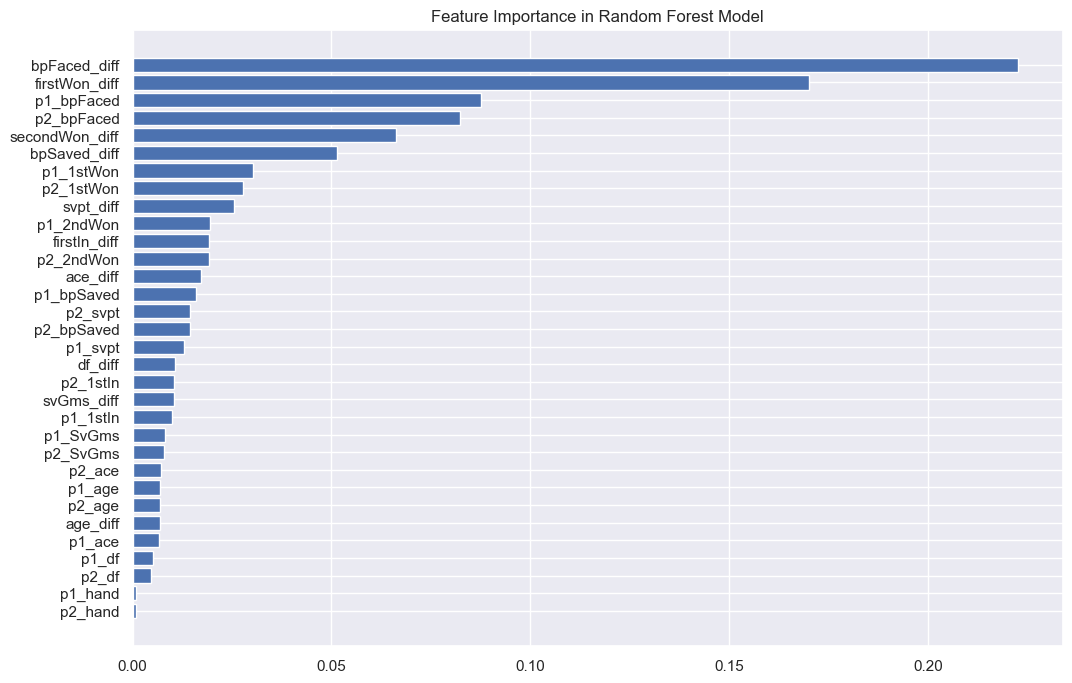

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = best_model.feature_importances_
# Match feature names to their importances
features = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance in Random Forest Model")
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align="center")
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices])
plt.gca().invert_yaxis()
plt.show()

Based on the bar chart above, we can conclude the top 5 features importance for predicting the match outcome in **Random Forest Classifier** are **break point faced** (bpFaced), **first-serve point won** (firstWon), **second-serve point won** (secondWon), **break point saved** (bpSaved), and **serve point** (svpt). 

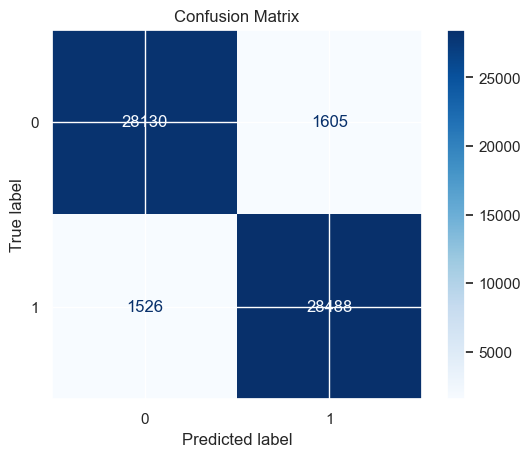

Accuracy: 0.9475974493296959
Precision: 0.947599932363085
Recall (Sensitivity): 0.9475974493296959
Specificity: 0.9460232049772995
F1-Score: 0.9475970341684045


In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Create a confusion matrix display and plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Optional: use cmap to change color, like 'Blues' or 'Greens'
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision (for binary classification, or specify average for multi-class)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Compute the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("Specificity:", specificity)
print("F1-Score:", f1)

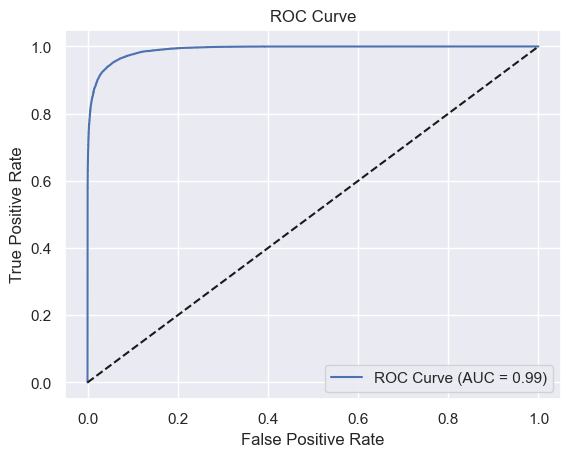

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_test (true labels) and y_pred_proba (predicted probabilities) are available
# For RandomForestClassifier, get probabilities with predict_proba()
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

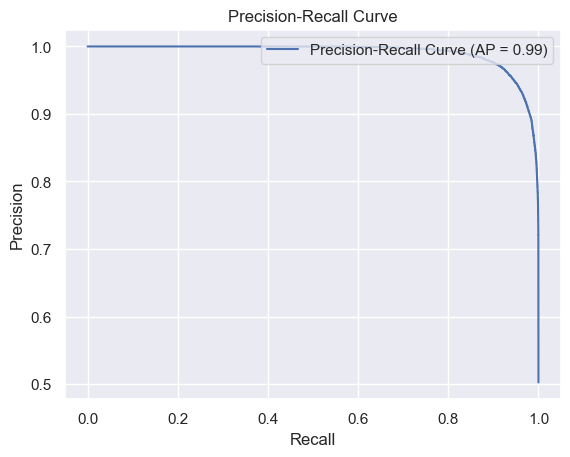

In [109]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming y_test (true labels) and y_pred_proba (predicted probabilities) are available
# For RandomForestClassifier, get probabilities with predict_proba()
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate average precision score
avg_precision = average_precision_score(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()

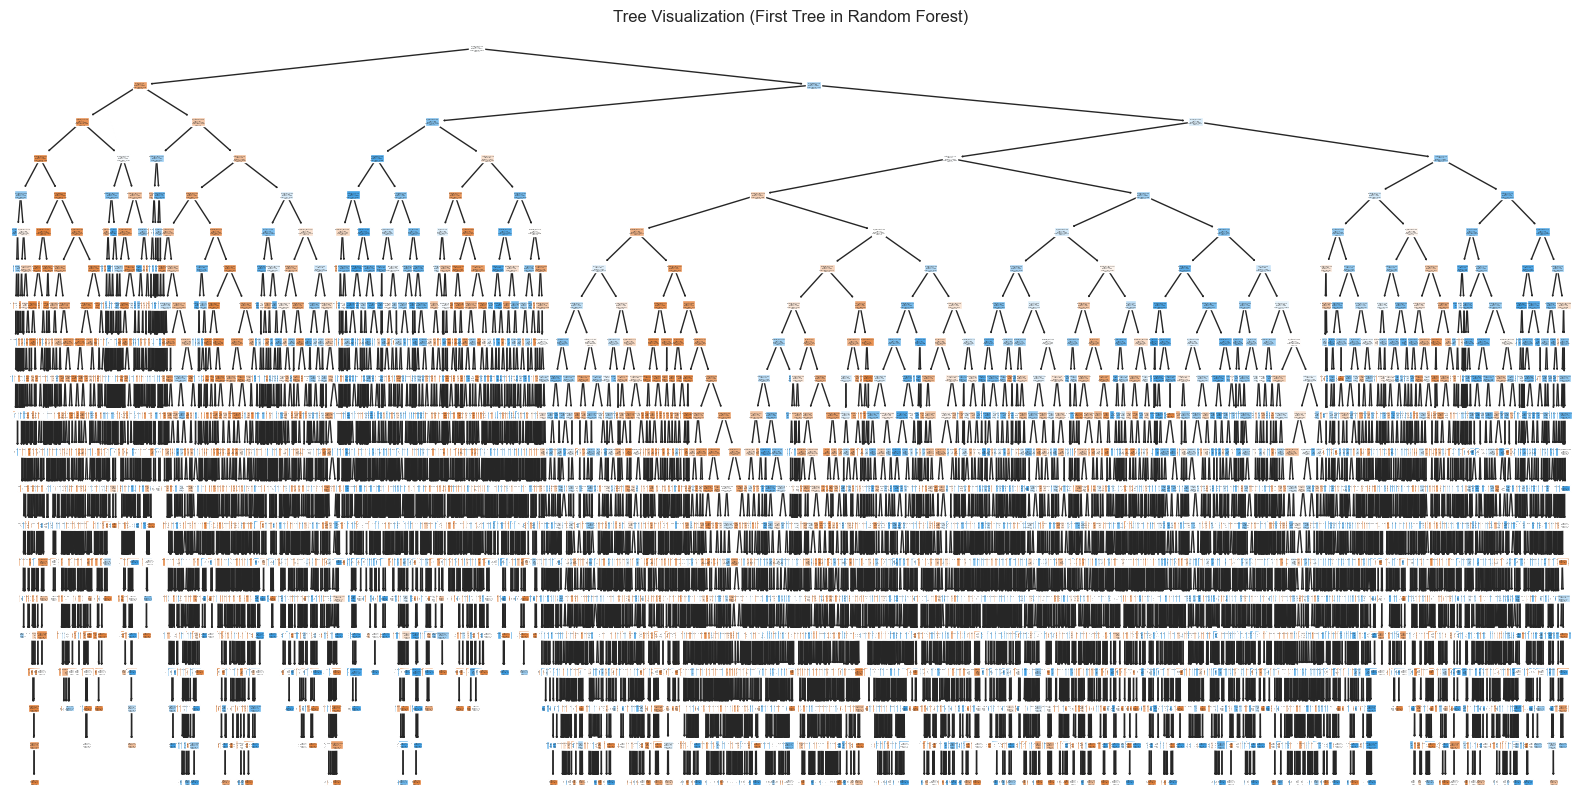

In [111]:
from sklearn.tree import plot_tree

# Assuming rf_model is your RandomForestClassifier and X_train is your training data
tree = best_model.estimators_[0]  # Select the first tree

plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X_train.columns, class_names=[str(cls) for cls in best_model.classes_], filled=True)
plt.title("Tree Visualization (First Tree in Random Forest)")
plt.show()

## <b>E. XGBoost</b>
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. In this case, XGBoost will increase the effiency of random forest done before.

In [113]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

Afterwards, let's use the dataframe with the randomized 'outcome' from Random Forest Classifier

In [115]:
randFor_df.head(5)

,match_id,tourney_name,surface,tourney_level,tourney_date,p1_id,p1_age,p1_hand,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_SvGms,p1_bpSaved,p1_bpFaced,p2_id,p2_age,p2_hand,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_SvGms,p2_bpSaved,p2_bpFaced,outcome,age_diff,ace_diff,df_diff,svpt_diff,bpSaved_diff,bpFaced_diff,firstIn_diff,firstWon_diff,secondWon_diff,svGms_diff
0,1991-339,Adelaide,Hard,A,1990-12-31,101723,20.7,2,6.0,2.0,96.0,55.0,39.0,25.0,15.0,2.0,4.0,101414,23.1,2,8.0,3.0,95.0,62.0,44.0,23.0,16.0,6.0,8.0,1,-2.4,-2.0,-1.0,1.0,-4.0,-4.0,-7.0,-5.0,2.0,-1.0
1,1991-339,Adelaide,Hard,A,1990-12-31,100946,27.4,2,19.0,4.0,101.0,56.0,45.0,25.0,15.0,9.0,10.0,101256,24.6,1,8.0,2.0,84.0,41.0,35.0,27.0,15.0,1.0,2.0,1,2.8,11.0,2.0,17.0,8.0,8.0,15.0,10.0,-2.0,0.0
2,1991-339,Adelaide,Hard,A,1990-12-31,101421,23.0,2,2.0,2.0,60.0,37.0,22.0,6.0,8.0,4.0,8.0,101234,24.8,2,6.0,1.0,54.0,31.0,24.0,13.0,8.0,1.0,1.0,0,-1.8,-4.0,1.0,6.0,3.0,7.0,6.0,-2.0,-7.0,0.0
3,1991-339,Adelaide,Hard,A,1990-12-31,101703,20.8,2,3.0,3.0,74.0,45.0,30.0,11.0,10.0,5.0,8.0,101889,19.7,2,2.0,0.0,60.0,40.0,30.0,14.0,9.0,3.0,3.0,0,1.1,1.0,3.0,14.0,2.0,5.0,5.0,0.0,-3.0,1.0
4,1991-339,Adelaide,Hard,A,1990-12-31,101843,19.9,2,2.0,2.0,77.0,41.0,28.0,15.0,11.0,4.0,8.0,101274,24.4,2,4.0,2.0,72.0,40.0,33.0,14.0,10.0,7.0,8.0,0,-4.5,-2.0,0.0,5.0,-3.0,0.0,1.0,-5.0,1.0,1.0


In [117]:
X.head(10)

,p1_age,p1_hand,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_SvGms,p1_bpSaved,p1_bpFaced,p2_age,p2_hand,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_SvGms,p2_bpSaved,p2_bpFaced,age_diff,ace_diff,df_diff,svpt_diff,bpSaved_diff,bpFaced_diff,firstIn_diff,firstWon_diff,secondWon_diff,svGms_diff
0,20.7,2,6.0,2.0,96.0,55.0,39.0,25.0,15.0,2.0,4.0,23.1,2,8.0,3.0,95.0,62.0,44.0,23.0,16.0,6.0,8.0,-2.4,-2.0,-1.0,1.0,-4.0,-4.0,-7.0,-5.0,2.0,-1.0
1,27.4,2,19.0,4.0,101.0,56.0,45.0,25.0,15.0,9.0,10.0,24.6,1,8.0,2.0,84.0,41.0,35.0,27.0,15.0,1.0,2.0,2.8,11.0,2.0,17.0,8.0,8.0,15.0,10.0,-2.0,0.0
2,23.0,2,2.0,2.0,60.0,37.0,22.0,6.0,8.0,4.0,8.0,24.8,2,6.0,1.0,54.0,31.0,24.0,13.0,8.0,1.0,1.0,-1.8,-4.0,1.0,6.0,3.0,7.0,6.0,-2.0,-7.0,0.0
3,20.8,2,3.0,3.0,74.0,45.0,30.0,11.0,10.0,5.0,8.0,19.7,2,2.0,0.0,60.0,40.0,30.0,14.0,9.0,3.0,3.0,1.1,1.0,3.0,14.0,2.0,5.0,5.0,0.0,-3.0,1.0
4,19.9,2,2.0,2.0,77.0,41.0,28.0,15.0,11.0,4.0,8.0,24.4,2,4.0,2.0,72.0,40.0,33.0,14.0,10.0,7.0,8.0,-4.5,-2.0,0.0,5.0,-3.0,0.0,1.0,-5.0,1.0,1.0
5,18.0,2,2.0,1.0,61.0,45.0,32.0,4.0,8.0,7.0,9.0,24.3,2,1.0,0.0,62.0,45.0,20.0,8.0,9.0,10.0,16.0,-6.3,1.0,1.0,-1.0,-3.0,-7.0,0.0,12.0,-4.0,-1.0
6,19.0,2,0.0,4.0,47.0,22.0,16.0,8.0,8.0,3.0,7.0,19.6,2,3.0,0.0,46.0,22.0,18.0,16.0,8.0,2.0,2.0,-0.6,-3.0,4.0,1.0,1.0,5.0,0.0,-2.0,-8.0,0.0
7,22.2,2,7.0,1.0,49.0,32.0,28.0,12.0,10.0,0.0,0.0,25.3,2,2.0,0.0,64.0,42.0,27.0,13.0,10.0,7.0,9.0,-3.1,5.0,1.0,-15.0,-7.0,-9.0,-10.0,1.0,-1.0,0.0
8,20.4,1,11.0,17.0,131.0,69.0,52.0,25.0,17.0,5.0,9.0,23.8,2,2.0,0.0,120.0,88.0,59.0,16.0,17.0,11.0,14.0,-3.4,9.0,17.0,11.0,-6.0,-5.0,-19.0,-7.0,9.0,0.0
9,20.7,2,9.0,0.0,48.0,28.0,25.0,15.0,10.0,0.0,0.0,20.3,2,4.0,1.0,50.0,27.0,19.0,12.0,9.0,2.0,4.0,0.4,5.0,-1.0,-2.0,-2.0,-4.0,1.0,6.0,3.0,1.0


In [119]:
X_train.head(10)

,p1_age,p1_hand,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_SvGms,p1_bpSaved,p1_bpFaced,p2_age,p2_hand,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_SvGms,p2_bpSaved,p2_bpFaced,age_diff,ace_diff,df_diff,svpt_diff,bpSaved_diff,bpFaced_diff,firstIn_diff,firstWon_diff,secondWon_diff,svGms_diff
56033,27.3,2,9.0,1.0,74.0,40.0,35.0,18.0,13.0,0.0,1.0,24.8,2,4.0,4.0,86.0,33.0,22.0,25.0,14.0,6.0,12.0,2.5,5.0,-3.0,-12.0,-6.0,-11.0,7.0,13.0,-7.0,-1.0
181111,21.1,1,1.0,1.0,46.0,33.0,19.0,4.0,8.0,1.0,5.0,38.8,3,5.0,3.0,44.0,31.0,23.0,9.0,9.0,0.0,1.0,-17.7,-4.0,-2.0,2.0,1.0,4.0,2.0,-4.0,-5.0,-1.0
57267,23.8,2,12.0,4.0,70.0,37.0,31.0,19.0,13.0,2.0,4.0,23.4,2,14.0,0.0,67.0,51.0,40.0,8.0,13.0,2.0,4.0,0.4,-2.0,4.0,3.0,0.0,0.0,-14.0,-9.0,11.0,0.0
113166,25.0,2,4.0,2.0,57.0,41.0,33.0,7.0,9.0,2.0,4.0,26.0,2,3.0,5.0,62.0,40.0,23.0,7.0,10.0,3.0,8.0,-1.0,1.0,-3.0,-5.0,-1.0,-4.0,1.0,10.0,0.0,-1.0
5671,22.2,2,3.0,6.0,181.0,126.0,86.0,21.0,26.0,9.0,16.0,26.5,2,10.0,4.0,195.0,107.0,80.0,40.0,25.0,7.0,11.0,-4.3,-7.0,2.0,-14.0,2.0,5.0,19.0,6.0,-19.0,1.0
147197,29.7,2,7.0,1.0,62.0,44.0,34.0,11.0,9.0,7.0,7.0,18.6,1,1.0,1.0,45.0,32.0,20.0,6.0,8.0,1.0,4.0,11.1,6.0,0.0,17.0,6.0,3.0,12.0,14.0,5.0,1.0
143872,31.6,2,3.0,12.0,52.0,25.0,19.0,7.0,8.0,7.0,11.0,30.8,2,5.0,0.0,39.0,29.0,27.0,5.0,8.0,0.0,0.0,0.8,-2.0,12.0,13.0,7.0,11.0,-4.0,-8.0,2.0,0.0
163503,30.7,1,3.0,0.0,77.0,56.0,31.0,13.0,11.0,9.0,13.0,31.7,1,5.0,0.0,71.0,52.0,39.0,6.0,11.0,8.0,10.0,-1.0,-2.0,0.0,6.0,1.0,3.0,4.0,-8.0,7.0,0.0
102419,27.0,3,1.0,4.0,68.0,36.0,26.0,18.0,10.0,3.0,6.0,23.3,2,5.0,4.0,73.0,43.0,34.0,18.0,11.0,0.0,2.0,3.7,-4.0,0.0,-5.0,3.0,4.0,-7.0,-8.0,0.0,-1.0
26664,27.8,2,6.0,13.0,73.0,40.0,28.0,12.0,10.0,9.0,13.0,29.0,2,5.0,5.0,55.0,27.0,22.0,14.0,9.0,3.0,4.0,-1.2,1.0,8.0,18.0,6.0,9.0,13.0,6.0,-2.0,1.0


In [121]:
X_test.head(10)

,p1_age,p1_hand,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_SvGms,p1_bpSaved,p1_bpFaced,p2_age,p2_hand,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_SvGms,p2_bpSaved,p2_bpFaced,age_diff,ace_diff,df_diff,svpt_diff,bpSaved_diff,bpFaced_diff,firstIn_diff,firstWon_diff,secondWon_diff,svGms_diff
46351,24.0,2,2.0,4.0,84.0,49.0,35.0,14.0,14.0,2.0,7.0,26.4,2,3.0,1.0,85.0,64.0,44.0,11.0,14.0,1.0,4.0,-2.4,-1.0,3.0,-1.0,1.0,3.0,-15.0,-9.0,3.0,0.0
66478,27.3,2,3.0,5.0,56.0,33.0,19.0,10.0,8.0,4.0,7.0,35.3,2,5.0,3.0,55.0,33.0,29.0,11.0,9.0,2.0,2.0,-8.0,-2.0,2.0,1.0,2.0,5.0,0.0,-10.0,-1.0,-1.0
2675,21.3,2,0.0,1.0,66.0,41.0,20.0,11.0,8.0,3.0,8.0,20.7,2,2.0,0.0,50.0,27.0,18.0,15.0,8.0,2.0,3.0,0.6,-2.0,1.0,16.0,1.0,5.0,14.0,2.0,-4.0,0.0
141793,22.9,2,4.0,4.0,60.0,39.0,30.0,9.0,10.0,2.0,4.0,30.2,2,1.0,3.0,52.0,31.0,23.0,17.0,10.0,0.0,0.0,-7.3,3.0,1.0,8.0,2.0,4.0,8.0,7.0,-8.0,0.0
77063,22.6,2,4.0,2.0,57.0,32.0,25.0,14.0,8.0,3.0,3.0,25.5,2,6.0,2.0,42.0,25.0,16.0,4.0,7.0,3.0,7.0,-2.9,-2.0,0.0,15.0,0.0,-4.0,7.0,9.0,10.0,1.0
25489,22.3,2,3.0,2.0,46.0,26.0,14.0,10.0,8.0,5.0,8.0,25.6,2,4.0,1.0,45.0,28.0,25.0,11.0,9.0,0.0,0.0,-3.3,-1.0,1.0,1.0,5.0,8.0,-2.0,-11.0,-1.0,-1.0
160670,20.7,2,2.0,3.0,71.0,46.0,31.0,15.0,11.0,4.0,6.0,21.0,2,1.0,3.0,58.0,24.0,18.0,18.0,10.0,1.0,4.0,-0.3,1.0,0.0,13.0,3.0,2.0,22.0,13.0,-3.0,1.0
89401,26.0,2,4.0,1.0,49.0,33.0,23.0,8.0,9.0,2.0,5.0,21.1,2,11.0,0.0,57.0,46.0,36.0,5.0,10.0,0.0,1.0,4.9,-7.0,1.0,-8.0,2.0,4.0,-13.0,-13.0,3.0,-1.0
133850,27.1,2,11.0,2.0,59.0,32.0,25.0,16.0,12.0,1.0,4.0,34.1,2,15.0,7.0,92.0,49.0,39.0,18.0,12.0,14.0,16.0,-7.0,-4.0,-5.0,-33.0,-13.0,-12.0,-17.0,-14.0,-2.0,0.0
187157,23.3,2,5.0,2.0,54.0,33.0,28.0,13.0,10.0,0.0,0.0,21.3,2,2.0,1.0,64.0,37.0,27.0,12.0,9.0,2.0,4.0,2.0,3.0,1.0,-10.0,-2.0,-4.0,-4.0,1.0,1.0,1.0


In [123]:
y.head(10)

0    1
1    1
2    0
3    0
4    0
5    1
6    0
7    1
8    0
9    1
Name: outcome, dtype: int64

In [125]:
y_train.head(10)

56033     1
181111    0
57267     1
113166    1
5671      0
147197    1
143872    0
163503    0
102419    0
26664     0
Name: outcome, dtype: int64

In [127]:
y_test.head(10)

46351     1
66478     0
2675      0
141793    0
77063     1
25489     0
160670    1
89401     0
133850    0
187157    1
Name: outcome, dtype: int64

In [129]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# XGBoost model setup and parameter grid
xgb_model = XGBClassifier(eval_metric='logloss')  # Set eval_metric to avoid warnings
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
}
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
xgb_grid_search.fit(X_train, y_train)
print("XGBoost Best Parameters:", xgb_grid_search.best_params_)
print("XGBoost Best Score:", xgb_grid_search.best_score_)

# Make predictions using the best model
y_pred_xgb = xgb_grid_search.predict(X_test)

# F1-Score
f1 = f1_score(y_test, y_pred_xgb, average='weighted')  # Use 'binary' if this is binary classification

# Compute the confusion matrix and specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_xgb).ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Output evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb, average='weighted'))
print("Recall (Sensitivity):", recall_score(y_test, y_pred_xgb, average='weighted'))
print("Specificity:", specificity)
print("F1-Score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Best Score: 0.9558933273349318
Accuracy: 0.9558486334499322
Precision: 0.9558534404687683
Recall (Sensitivity): 0.9558486334499322
Specificity: 0.9538927190179922
F1-Score: 0.9558481408063529
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     29735
           1       0.95      0.96      0.96     30014

    accuracy                           0.96     59749
   macro avg       0.96      0.96      0.96     59749
weighted avg       0.96      0.96      0.96     59749



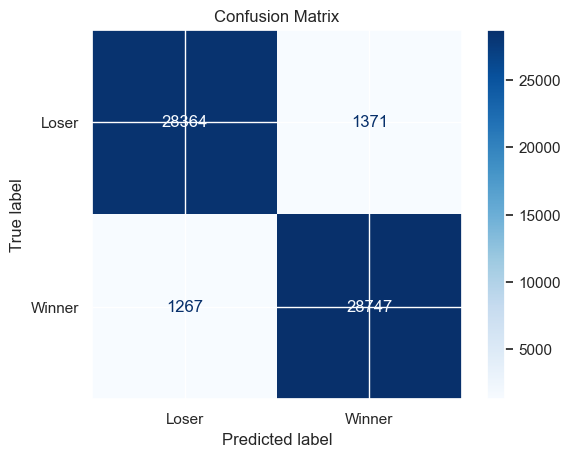

In [131]:
# Plot the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb_grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Loser', 'Winner'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

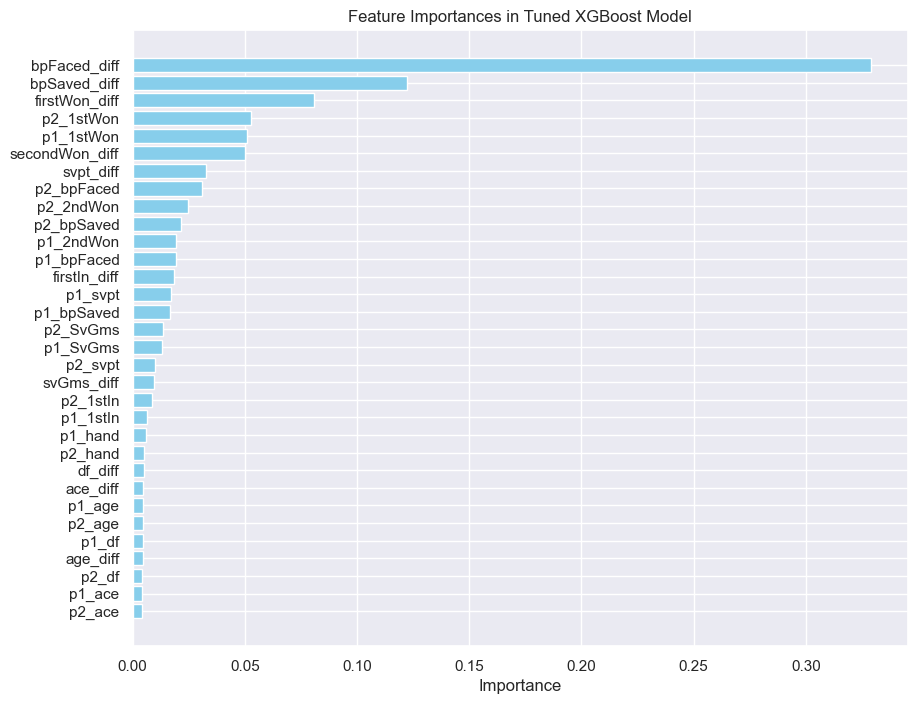

In [137]:
# Retrieve the best model from GridSearchCV
best_xgb_model = xgb_grid_search.best_estimator_

# Get feature importances
feature_importances = best_xgb_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importances in Tuned XGBoost Model")
plt.gca().invert_yaxis()
plt.show()


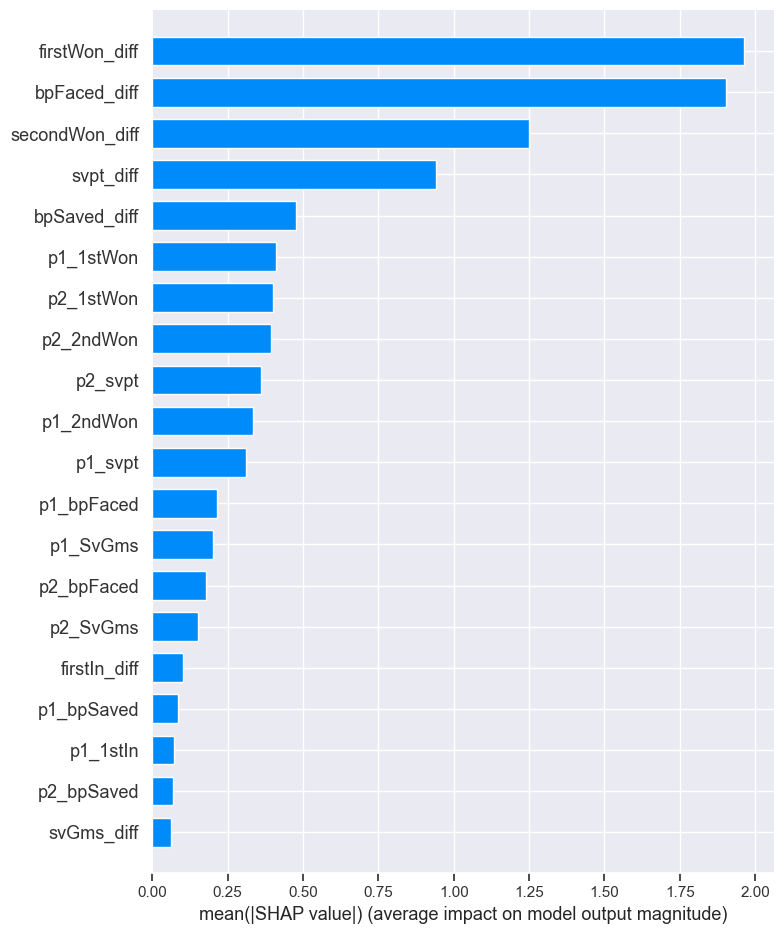

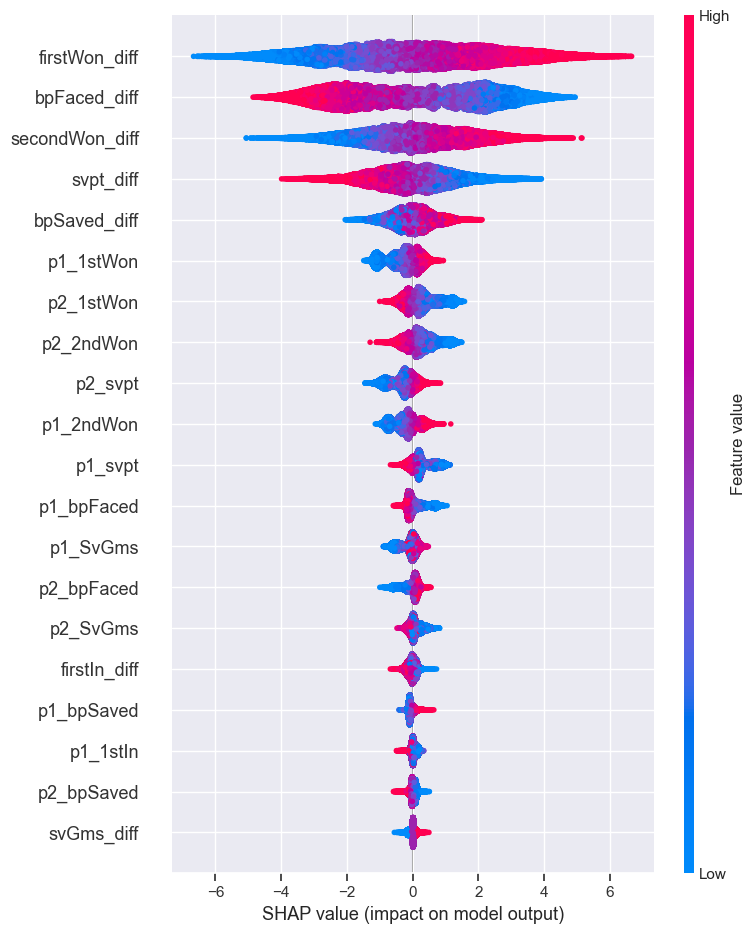

In [139]:
import shap

# Use the best model from GridSearchCV
best_xgb_model = xgb_grid_search.best_estimator_

# Create a SHAP TreeExplainer object
explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X)

# Summary plot for global feature importance
shap.summary_plot(shap_values, X, plot_type="bar")  # Bar plot for feature importance
shap.summary_plot(shap_values, X)  # Detailed SHAP distribution plot


Based on these visualizations, we can conclude that the top 5 features importance in **XGBoost** are **first-serve point won** (firstWon), **break point faced** (bpFaced), **second-serve point won** (secondWon), **serve point** (svpt), and **break point saved** (bpSaved) 

In [143]:
predicted_win_prob_xgb = predict_match_probability_v2(206173, 207989, player_stats, best_xgb_model)
print("Predicted Win Probabilities for Player 1 and Player 2:", predicted_win_prob_xgb)

Predicted Win Probabilities for Player 1 and Player 2: [0.07350707 0.9264929 ]


## <b>F. Logistic Regression</b>
Logistic regression is a machine learning method to find the relationships between two data factors. Basically, the algorithm's workflow is similar to linear regression, but its outcome is in binary (1 or 0).Then, it uses this relationship to predict the value of one of those factors based on the other. 

> Key Features of Logistic Regression:
1. `Match Outcome`: Logistic Regression will give us the match outcome clearly (either win or lose)
2. `Match Statistics`: All of the statistices will be the key feature to predict the match outcome.



In [145]:
logReg_pd = pd.read_csv ("data_used.csv")
logReg_pd.sample(10)

,match_id,tourney_name,surface,tourney_level,tourney_date,p1_id,p1_age,p1_hand,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_SvGms,p1_bpSaved,p1_bpFaced,p2_id,p2_age,p2_hand,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_SvGms,p2_bpSaved,p2_bpFaced,outcome
17643,1996-425,Barcelona,Clay,A,1996-04-15,102167,23.2,R,3.0,4.0,102.0,65.0,45.0,17.0,15.0,8.0,12.0,102456,21.5,R,3.0,2.0,107.0,78.0,50.0,14.0,16.0,8.0,12.0,1
111966,2012-854,Bergamo CH,Hard,C,2012-02-13,104505,26.9,R,6.0,3.0,54.0,38.0,22.0,7.0,9.0,3.0,7.0,103096,34.1,R,4.0,1.0,64.0,39.0,28.0,13.0,9.0,3.0,4.0,0
180943,2022-2801,Nonthaburi 3 CH,Hard,C,2022-09-05,208055,23.6,R,9.0,3.0,71.0,47.0,37.0,17.0,11.0,2.0,2.0,208158,21.9,U,9.0,3.0,74.0,44.0,33.0,18.0,11.0,3.0,4.0,1
195754,2024-2831,Oeiras 1 CH,Hard,C,2024-01-01,126652,25.4,R,2.0,0.0,62.0,42.0,34.0,15.0,11.0,3.0,3.0,208854,20.6,R,9.0,2.0,73.0,36.0,25.0,21.0,10.0,5.0,6.0,1
24185,1998-308,Munich,Clay,A,1998-04-27,102358,24.1,R,7.0,3.0,79.0,40.0,31.0,21.0,11.0,4.0,5.0,102796,21.9,R,8.0,3.0,73.0,46.0,29.0,13.0,10.0,3.0,6.0,1
182173,2022-1741,Busan CH,Hard,C,2022-10-17,105430,32.9,R,1.0,3.0,85.0,45.0,24.0,20.0,13.0,6.0,12.0,111794,26.7,R,4.0,2.0,87.0,55.0,34.0,14.0,14.0,4.0,9.0,0
29227,2000-311,Queen's Club,Grass,A,2000-06-12,102106,27.7,R,5.0,5.0,127.0,69.0,52.0,23.0,16.0,11.0,16.0,103206,22.0,R,7.0,0.0,122.0,62.0,45.0,33.0,15.0,14.0,16.0,1
97140,2010-472,Pozoblanco CH,Hard,C,2010-07-05,104219,26.9,R,10.0,1.0,45.0,23.0,19.0,15.0,9.0,0.0,1.0,102567,35.2,R,5.0,1.0,59.0,33.0,20.0,13.0,10.0,1.0,5.0,1
35960,2002-416,Rome Masters,Clay,M,2002-05-06,101948,30.7,R,15.0,5.0,98.0,46.0,35.0,31.0,15.0,6.0,8.0,102456,27.6,R,2.0,3.0,98.0,69.0,52.0,16.0,16.0,2.0,2.0,0
48993,2007-311,Queen's Club,Grass,A,2007-06-11,104542,22.1,R,5.0,2.0,55.0,35.0,29.0,13.0,9.0,1.0,2.0,103709,26.3,R,3.0,4.0,62.0,34.0,21.0,10.0,9.0,5.0,9.0,1


In [149]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, precision_score, recall_score

# Encode categorical 'hand' columns
label_encoder = LabelEncoder()
logReg_pd['p1_hand'] = label_encoder.fit_transform(logReg_pd['p1_hand'])
logReg_pd['p2_hand'] = label_encoder.transform(logReg_pd['p2_hand'])

# Create difference-based features
logReg_pd['age_diff'] = logReg_pd['p1_age'] - logReg_pd['p2_age']
logReg_pd['ace_diff'] = logReg_pd['p1_ace'] - logReg_pd['p2_ace']
logReg_pd['df_diff'] = logReg_pd['p1_df'] - logReg_pd['p2_df']
logReg_pd['svpt_diff'] = logReg_pd['p1_svpt'] - logReg_pd['p2_svpt']
logReg_pd['bpSaved_diff'] = logReg_pd['p1_bpSaved'] - logReg_pd['p2_bpSaved']
logReg_pd['bpFaced_diff'] = logReg_pd['p1_bpFaced'] - logReg_pd['p2_bpFaced']
logReg_pd['firstIn_diff'] = logReg_pd['p1_1stIn'] - logReg_pd['p2_1stIn']
logReg_pd['firstWon_diff'] = logReg_pd['p1_1stWon'] - logReg_pd['p2_1stWon']
logReg_pd['secondWon_diff'] = logReg_pd['p1_2ndWon'] - logReg_pd['p2_2ndWon']
logReg_pd['svGms_diff'] = logReg_pd['p1_SvGms'] - logReg_pd['p2_SvGms']

# Define features and target
features = ['p1_age', 'p1_hand', 'p1_ace', 'p1_df', 'p1_svpt',
            'p1_1stIn', 'p1_1stWon', 'p1_2ndWon', 'p1_SvGms',
            'p1_bpSaved', 'p1_bpFaced', 
            'p2_age', 'p2_hand', 'p2_ace', 'p2_df', 'p2_svpt',
            'p2_1stIn', 'p2_1stWon', 'p2_2ndWon', 'p2_SvGms',
            'p2_bpSaved', 'p2_bpFaced',
            'age_diff', 'ace_diff', 'df_diff', 'svpt_diff',
            'bpSaved_diff', 'bpFaced_diff', 'firstIn_diff', 
            'firstWon_diff', 'secondWon_diff', 'svGms_diff']

X = logReg_pd[features]
y = logReg_pd['outcome']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],    # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type (Note: 'elasticnet' requires 'solver' = 'saga')
    'solver': ['liblinear', 'saga'],        # Solvers supporting l1 and elasticnet penalties
    'l1_ratio': [0, 0.5, 1]                 # Ratio for elasticnet (only used if penalty='elasticnet')
}

# Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with Logistic Regression
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=2
)

# Perform Grid Search with cross-validation
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Make predictions using the best model from grid search
y_pred = best_model.predict(X_test_scaled)

# Evaluate the tuned model on the test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print results
print("Test Set Accuracy with Tuned Model:", accuracy)
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall (Sensitivity):", recall_score(y_test, y_pred, average='weighted'))
print("Specificity:", specificity)
print("F1-Score:", f1)
print("Classification Report:\n", classification_report(y_test, y_pred))

feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': best_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)
print("\nFeature Importance (top 10 features):")
print(feature_importance.head(10))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'C': 0.01, 'l1_ratio': 0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.9570123113478294
Test Set Accuracy with Tuned Model: 0.9569365177659878
Precision: 0.956937175010334
Recall (Sensitivity): 0.9569365177659878
Specificity: 0.9560114343366404
F1-Score: 0.9569363507397095
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     29735
           1       0.96      0.96      0.96     30014

    accuracy                           0.96     59749
   macro avg       0.96      0.96      0.96     59749
weighted avg       0.96      0.96      0.96     59749


Feature Importance (top 10 features):
           Feature  Coefficient
29   firstWon_diff     4.528888
27    bpFaced_diff    -3.527039
30  secondWon_diff     3.235156
25       svpt_diff    -2.990634
26    bpSaved_diff     2.251730
23        ace_diff    -0.065310
28

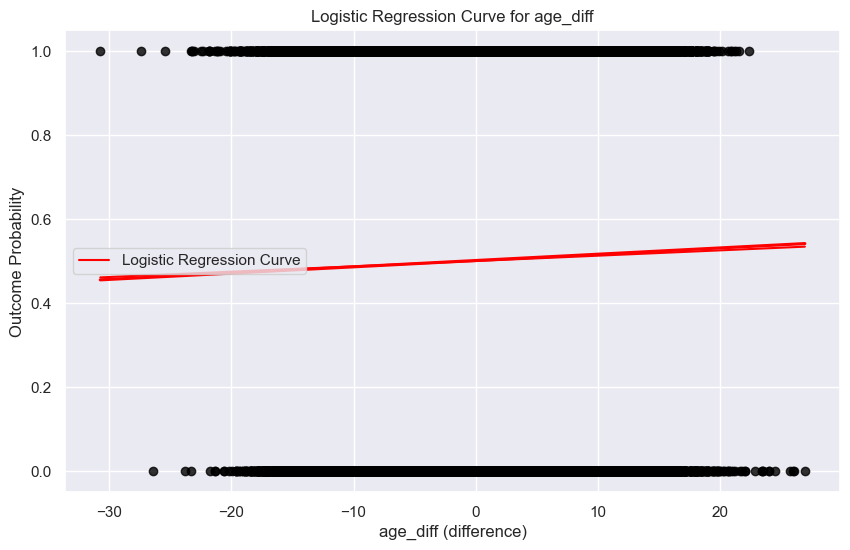

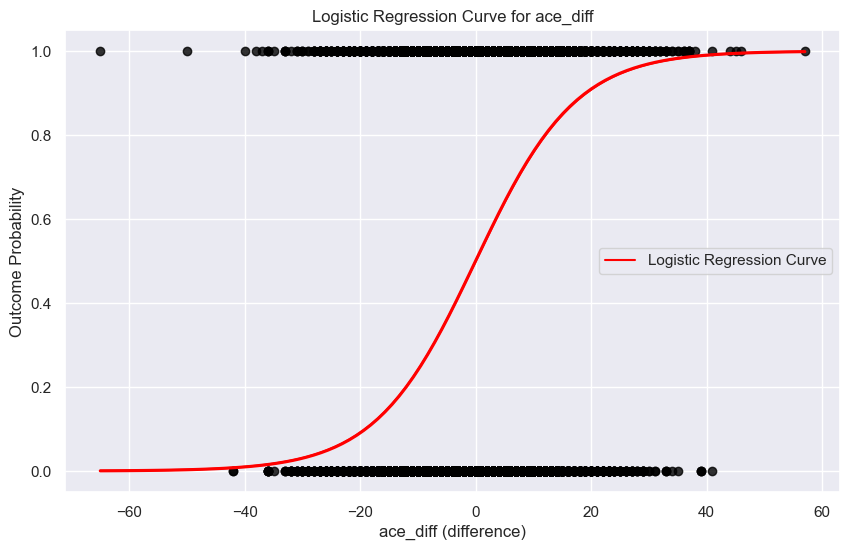

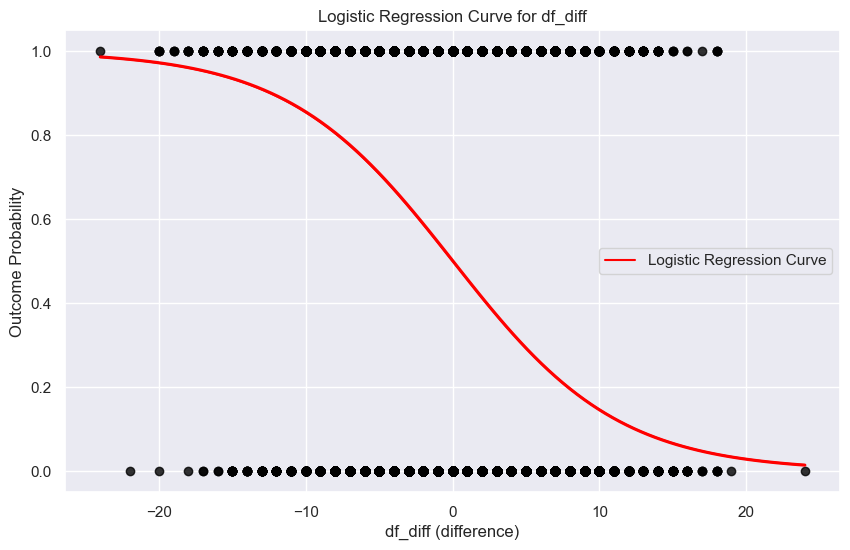

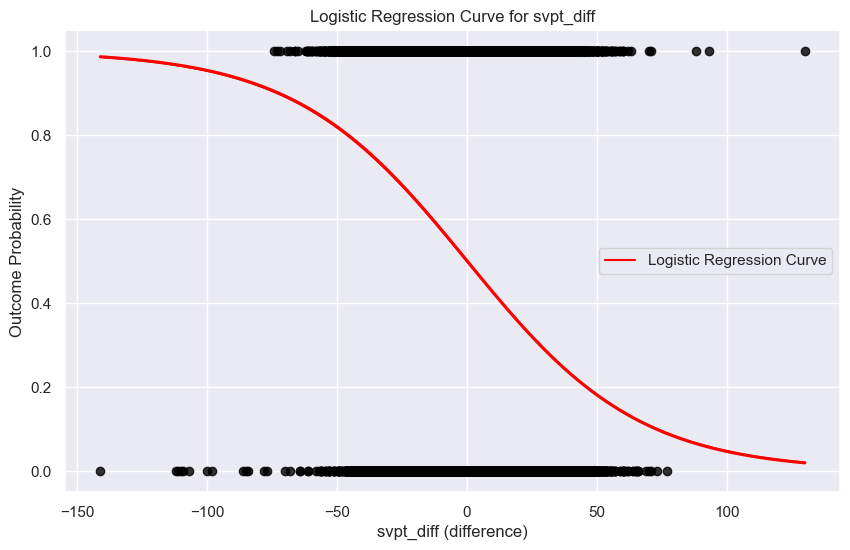

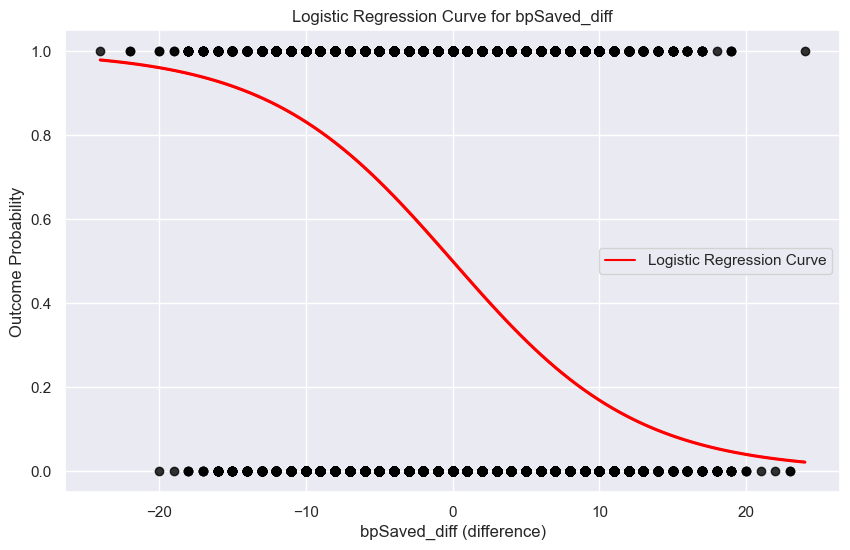

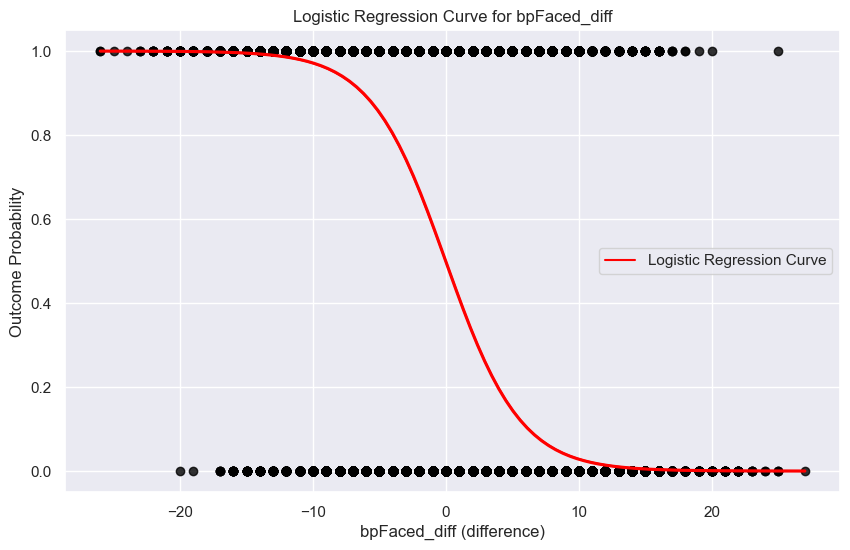

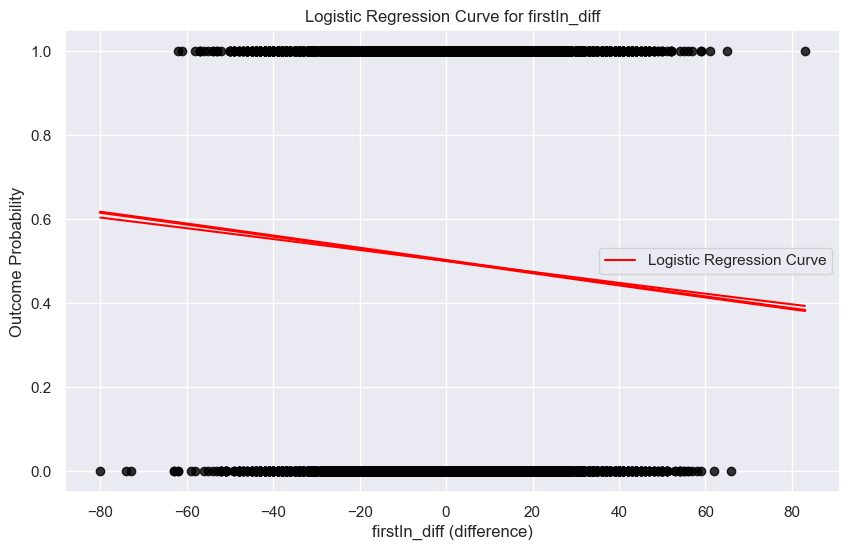

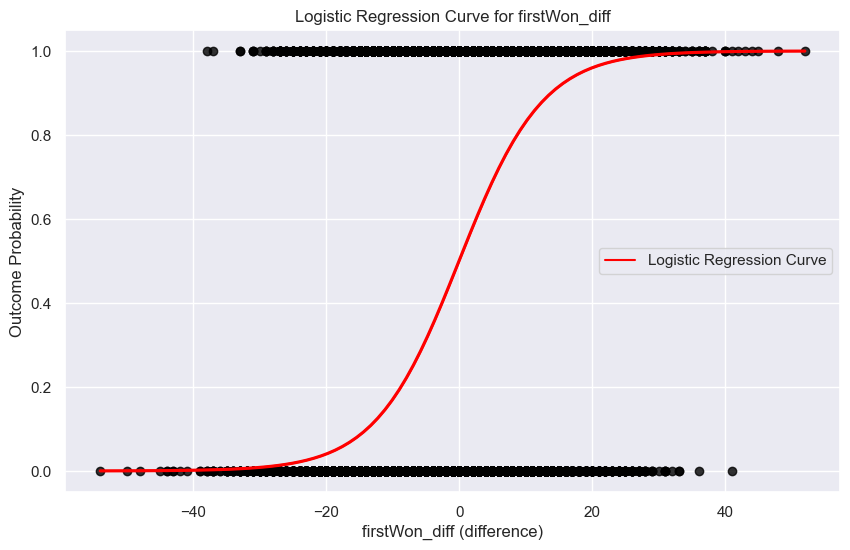

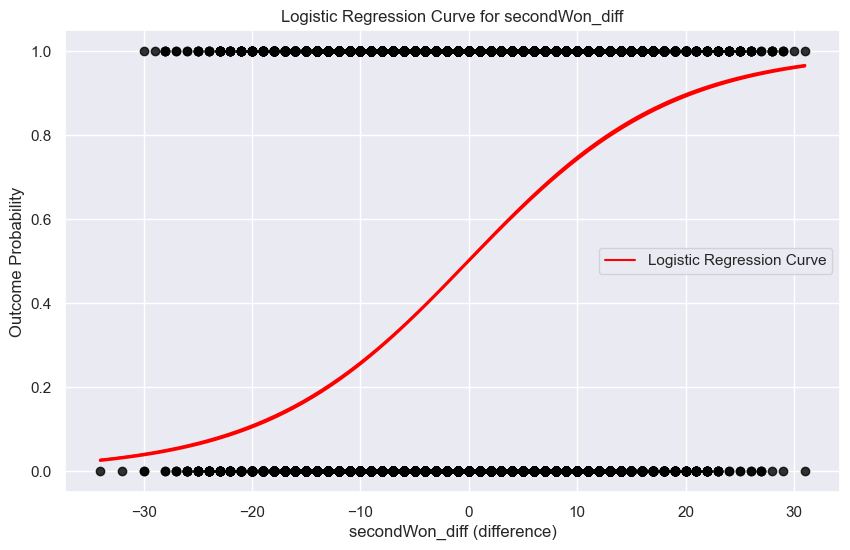

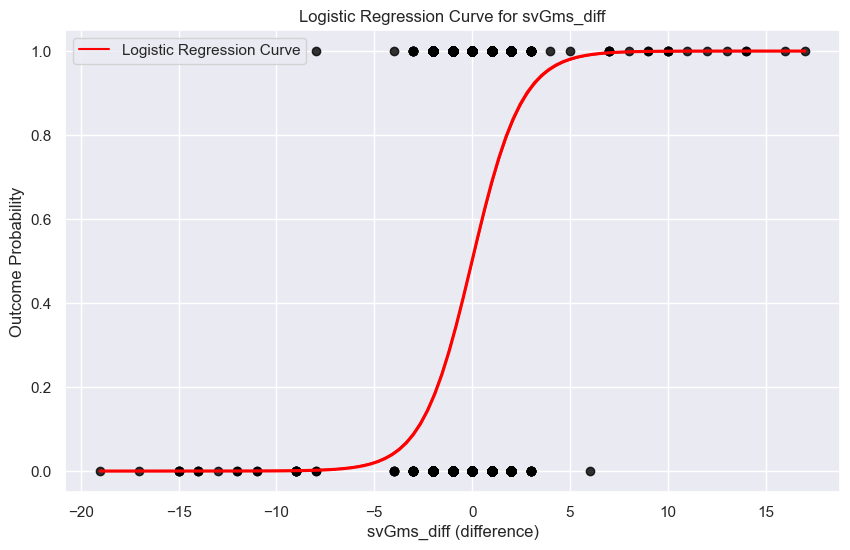

In [151]:
# Define the features you want to plot individually
features_to_plot = ['age_diff', 'ace_diff', 'df_diff', 'svpt_diff', 
                    'bpSaved_diff', 'bpFaced_diff', 'firstIn_diff', 
                    'firstWon_diff', 'secondWon_diff', 'svGms_diff']

# Loop through each feature to create and save individual plots
for feature in features_to_plot:
    X_plot = logReg_pd[[feature]]
    y_plot = logReg_pd['outcome']
    
    # Split and scale the selected feature
    X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(X_plot, y_plot, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_plot_scaled = scaler.fit_transform(X_train_plot)
    X_test_plot_scaled = scaler.transform(X_test_plot)
    
    # Fit a logistic regression model on this single feature with tuned parameters
    logRegression_plot = LogisticRegression(
        random_state=42,
        max_iter=1000,
        C=best_params['C'],
        penalty=best_params['penalty'],
        solver=best_params['solver'],
        l1_ratio=best_params.get('l1_ratio')  # This will be None if 'l1_ratio' is not used
    )
    logRegression_plot.fit(X_train_plot_scaled, y_train_plot)
    
    # Create a smooth curve for the logistic function based on the range of the feature
    X_range = np.linspace(X_plot[feature].min(), X_plot[feature].max(), 300)
    X_range_scaled = scaler.transform(X_range.reshape(-1, 1))
    y_prob = logRegression_plot.predict_proba(X_range_scaled)[:, 1]
    
    # Plot the logistic regression curve and data points
    plt.figure(figsize=(10, 6))
    sb.regplot(x=X_plot[feature], y=y_plot, logistic=True, ci=None,
               scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
    plt.plot(X_range, y_prob, color='red', label='Logistic Regression Curve')
    plt.xlabel(f'{feature} (difference)')
    plt.ylabel('Outcome Probability')
    plt.legend()
    plt.title(f'Logistic Regression Curve for {feature}')
    plt.show()


In [153]:
predicted_win_prob_logreg = predict_match_probability_v2(206173, 207989, player_stats, best_model)
print("Predicted Win Probabilities for Player 1 and Player 2:", predicted_win_prob_logreg)

Predicted Win Probabilities for Player 1 and Player 2: [0.1961236 0.8038764]


## <b>G. Neural Network</b>
Neural Network (NN) is a method in artificial intelligence (AI) that teaches computers to process data in a way that is inspired by the human brain. In this case, neural network will learn by their own about how to win a tennis match and learn which statistics is crucial to win the match. 


In [155]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

%matplotlib inline

In [157]:
neuralNetwork_pd = pd.read_csv('no_revisi.csv')

neuralNetwork_pd.head()

,Unnamed: 0,1st_player_seed,1st_player_age,2nd_player_seed,2nd_player_age,best_of,1st_player_ace,1st_player_df,1st_player_svpt,1st_player_1stIn,1st_player_1stWon,1st_player_2ndWon,1st_player_SvGms,1st_player_bpSaved,1st_player_bpFaced,2nd_player_ace,2nd_player_df,2nd_player_svpt,2nd_player_1stIn,2nd_player_1stWon,2nd_player_2ndWon,2nd_player_SvGms,2nd_player_bpSaved,2nd_player_bpFaced,surface_Clay,surface_Grass,surface_Hard,tourney_level_C,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,1st_player_hand_L,1st_player_hand_R,1st_player_hand_U,2nd_player_hand_L,2nd_player_hand_R,2nd_player_hand_U,round_ER,round_F,round_Q1,round_Q2,round_Q3,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,winner
0,0,1,23,0,20,3,8,3,95,62,44,23,16,6,8,6,2,96,55,39,25,15,2,4,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,0,24,0,27,3,8,2,84,41,35,27,15,1,2,19,4,101,56,45,25,15,9,10,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2,0,24,0,23,3,6,1,54,31,24,13,8,1,1,2,2,60,37,22,6,8,4,8,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,8,19,0,20,3,2,0,60,40,30,14,9,3,3,3,3,74,45,30,11,10,5,8,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,4,19,0,24,3,2,2,77,41,28,15,11,4,8,4,2,72,40,33,14,10,7,8,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [159]:
if 'Unnamed: 0' in neuralNetwork_pd.columns:
    neuralNetwork_pd = neuralNetwork_pd.drop(columns=['Unnamed: 0'])

neuralNetwork_pd.head()

,1st_player_seed,1st_player_age,2nd_player_seed,2nd_player_age,best_of,1st_player_ace,1st_player_df,1st_player_svpt,1st_player_1stIn,1st_player_1stWon,1st_player_2ndWon,1st_player_SvGms,1st_player_bpSaved,1st_player_bpFaced,2nd_player_ace,2nd_player_df,2nd_player_svpt,2nd_player_1stIn,2nd_player_1stWon,2nd_player_2ndWon,2nd_player_SvGms,2nd_player_bpSaved,2nd_player_bpFaced,surface_Clay,surface_Grass,surface_Hard,tourney_level_C,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,1st_player_hand_L,1st_player_hand_R,1st_player_hand_U,2nd_player_hand_L,2nd_player_hand_R,2nd_player_hand_U,round_ER,round_F,round_Q1,round_Q2,round_Q3,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,winner
0,1,23,0,20,3,8,3,95,62,44,23,16,6,8,6,2,96,55,39,25,15,2,4,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,24,0,27,3,8,2,84,41,35,27,15,1,2,19,4,101,56,45,25,15,9,10,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,24,0,23,3,6,1,54,31,24,13,8,1,1,2,2,60,37,22,6,8,4,8,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,8,19,0,20,3,2,0,60,40,30,14,9,3,3,3,3,74,45,30,11,10,5,8,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,19,0,24,3,2,2,77,41,28,15,11,4,8,4,2,72,40,33,14,10,7,8,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [161]:
# Calculate correlations of engineered features with the target
correlations = neuralNetwork_pd.corr()['winner'].sort_values(ascending=False)

# Display the correlation scores
print(correlations)

winner                1.000000
1st_player_bpFaced    0.411440
1st_player_bpSaved    0.193825
2nd_player_ace        0.165595
2nd_player_1stWon     0.159927
1st_player_df         0.156569
2nd_player_2ndWon     0.137565
2nd_player_seed       0.107617
1st_player_hand_U     0.065646
1st_player_svpt       0.051455
2nd_player_hand_R     0.037580
2nd_player_SvGms      0.027700
2nd_player_age        0.013306
1st_player_1stIn      0.010669
surface_Grass         0.004771
2nd_player_hand_L     0.002962
tourney_level_D       0.002487
round_RR              0.002362
round_Q1              0.001986
tourney_level_C       0.001563
round_R16             0.000918
round_SF              0.000738
round_F               0.000240
tourney_level_G       0.000152
round_R64            -0.000085
round_R128           -0.000324
surface_Clay         -0.000602
round_R32            -0.000666
tourney_level_F      -0.000980
round_Q2             -0.001040
best_of              -0.001109
round_QF             -0.001196
surface_

- First Model: (Not using **feature engineering** and **scaling** for the model)

In [163]:
def build_model(my_input_shape, my_lr=0.001):
    model = models.Sequential([
        layers.Dense(128, input_shape=(my_input_shape,),
                     activation=tf.keras.activations.swish),
        layers.Dense(64, activation=tf.keras.activations.swish),
        layers.Dense(32, activation=tf.keras.activations.swish),
        layers.Dense(16, activation=tf.keras.activations.swish),
        layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model with Adam optimizer and a reduced learning rate
    model.compile(optimizer=optimizers.Adam(learning_rate=my_lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [165]:
X = neuralNetwork_pd.drop(columns=['winner'])
y = neuralNetwork_pd['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

X_train.head()

,1st_player_seed,1st_player_age,2nd_player_seed,2nd_player_age,best_of,1st_player_ace,1st_player_df,1st_player_svpt,1st_player_1stIn,1st_player_1stWon,1st_player_2ndWon,1st_player_SvGms,1st_player_bpSaved,1st_player_bpFaced,2nd_player_ace,2nd_player_df,2nd_player_svpt,2nd_player_1stIn,2nd_player_1stWon,2nd_player_2ndWon,2nd_player_SvGms,2nd_player_bpSaved,2nd_player_bpFaced,surface_Clay,surface_Grass,surface_Hard,tourney_level_C,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,1st_player_hand_L,1st_player_hand_R,1st_player_hand_U,2nd_player_hand_L,2nd_player_hand_R,2nd_player_hand_U,round_ER,round_F,round_Q1,round_Q2,round_Q3,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
33315,0,23,16,19,3,1,7,68,44,31,9,10,3,6,5,2,62,33,28,15,11,3,4,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
97078,0,27,0,19,3,0,8,76,46,32,12,11,3,6,3,7,65,43,27,6,11,2,7,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
100505,8,28,0,22,3,0,3,90,47,30,20,10,15,18,2,3,62,32,19,11,9,2,7,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
83484,0,21,6,24,3,0,2,91,54,29,18,13,6,11,0,6,80,51,32,15,13,1,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
55625,4,33,0,20,3,2,2,74,51,39,14,11,1,1,3,1,63,36,27,15,10,1,2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [167]:
input_shape = X_train.shape[1]
model_1 = build_model(input_shape, my_lr=0.0001)

In [171]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping for both accuracy and validation accuracy
early_stopping_acc = EarlyStopping(
    monitor='accuracy',
    patience=5,
    mode='max',
    restore_best_weights=True
)

early_stopping_val_acc = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    mode='max',
    restore_best_weights=True
)

In [173]:
history_1 = model_1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.15,
                      callbacks=[early_stopping_acc, early_stopping_val_acc])

Epoch 1/50
4233/4233 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.8948 - loss: 0.2859 - val_accuracy: 0.9521 - val_loss: 0.1213
Epoch 2/50
4233/4233 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9517 - loss: 0.1190 - val_accuracy: 0.9547 - val_loss: 0.1115
Epoch 3/50
4233/4233 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9527 - loss: 0.1161 - val_accuracy: 0.9526 - val_loss: 0.1123
Epoch 4/50
4233/4233 ━━━━━━━━━━━━━━━━━━━━ 4s 998us/step - accuracy: 0.9529 - loss: 0.1140 - val_accuracy: 0.9535 - val_loss: 0.1099
Epoch 5/50
4233/4233 ━━━━━━━━━━━━━━━━━━━━ 4s 968us/step - accuracy: 0.9527 - loss: 0.1145 - val_accuracy: 0.9538 - val_loss: 0.1104
Epoch 6/50
4233/4233 ━━━━━━━━━━━━━━━━━━━━ 4s 967us/step - accuracy: 0.9525 - loss: 0.1141 - val_accuracy: 0.9537 - val_loss: 0.1093
Epoch 7/50
4233/4233 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9541 - loss: 0.1105 - val_accuracy: 0.9498 - val_loss: 0.1164


In [175]:
# Predict on test data
y_pred = model_1.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
loss, accuracy = model_1.evaluate(X_test, y_test)
loss_train, accuracy_train = model_1.evaluate(X_train, y_train)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R² Score: {r2:}')
print(f'Test Accuracy: {accuracy}')
print(f'Train Accuracy: {accuracy_train}')

1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 782us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.9566 - loss: 0.1076
4979/4979 ━━━━━━━━━━━━━━━━━━━━ 4s 702us/step - accuracy: 0.9563 - loss: 0.1074
MSE: 0.03239931116759291
MAE: 0.06594529624310375
R² Score: 0.8704025745391846
Test Accuracy: 0.9560917019844055
Train Accuracy: 0.9561470746994019


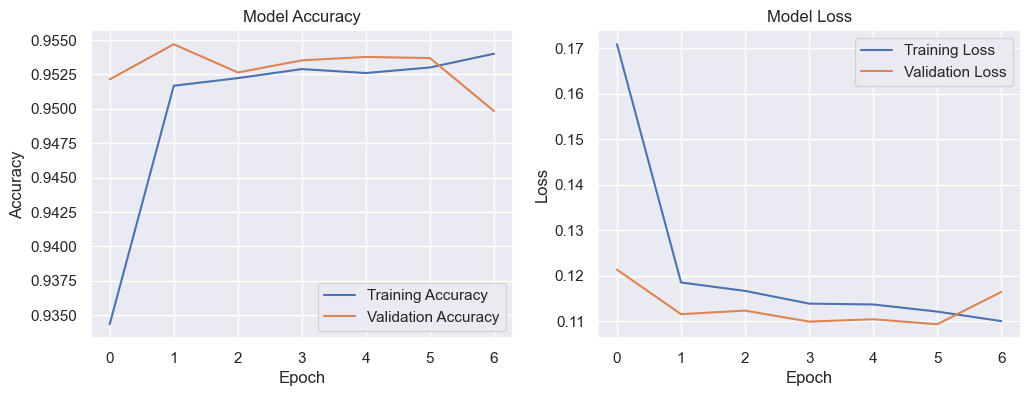

In [177]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
def plot_training_history(history):
    # Accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')
    
    plt.show()

# Call the function to plot the training history
plot_training_history(history_1)


1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 770us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 678us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 797us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step
1245/1245 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step
1245/1245 

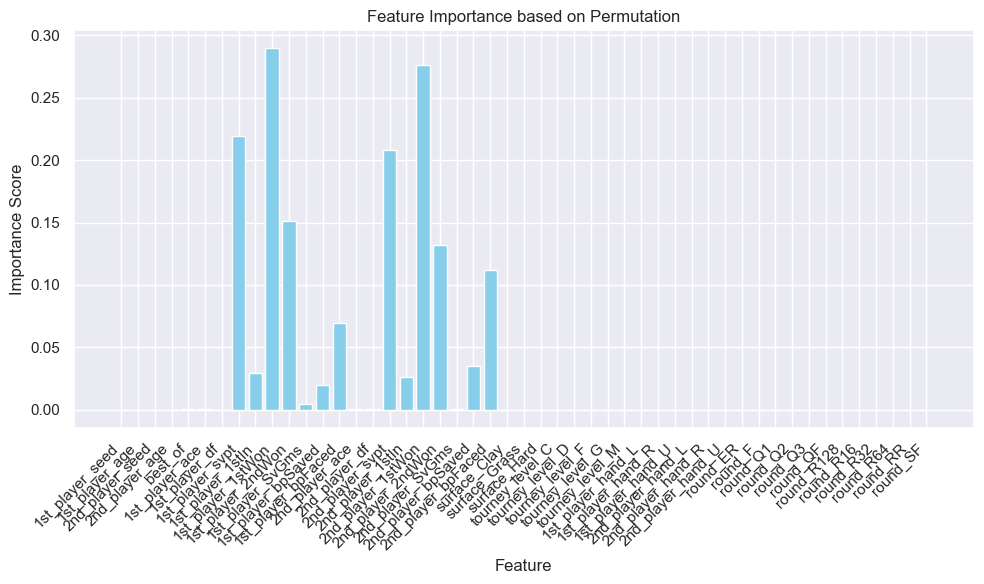

In [179]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def permutation_feature_importance(model, X, y, n_repeats=10):
    """
    Calculate permutation feature importance for a given model and dataset.
    
    Parameters:
        model: Trained model with a `predict` method.
        X: Feature matrix (Pandas DataFrame or numpy array).
        y: True labels (numpy array).
        n_repeats: Number of times to permute each feature.
        
    Returns:
        Dictionary of feature importances with feature names as keys.
    """
    # Convert X to numpy array if it's a DataFrame, and get feature names
    if isinstance(X, pd.DataFrame):
        feature_names = X.columns
        X = X.values
    else:
        feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

    # Calculate baseline accuracy with the original data
    baseline_accuracy = accuracy_score(y, (model.predict(X) > 0.5).astype(int))
    importances = {}

    # Loop over each feature column
    for i in range(X.shape[1]):
        permuted_accuracies = []
        
        # Repeat shuffling and calculate accuracy drops
        for _ in range(n_repeats):
            X_permuted = X.copy()
            np.random.shuffle(X_permuted[:, i])  # Shuffle the i-th column only
            permuted_accuracy = accuracy_score(y, (model.predict(X_permuted) > 0.5).astype(int))
            permuted_accuracies.append(permuted_accuracy)
        
        # Importance is the drop in accuracy due to shuffling
        feature_importance = baseline_accuracy - np.mean(permuted_accuracies)
        importances[feature_names[i]] = feature_importance

    return importances

# Assuming `X_test` is a DataFrame and `y_test` are your test data and labels
importances = permutation_feature_importance(model_1, X_test, y_test, n_repeats=5)

# Display feature importances
for feature, importance in sorted(importances.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: Importance = {importance:.4f}")

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(importances.keys(), importances.values(), color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance based on Permutation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- Second Model: **Remove Outlier**

In [181]:
# Function to remove outliers based on IQR for each column
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

# Apply the function to the DataFrame
df_no_outliers = remove_outliers(neuralNetwork_pd)

# Display the cleaned DataFrame
df_no_outliers.head()

,1st_player_seed,1st_player_age,2nd_player_seed,2nd_player_age,best_of,1st_player_ace,1st_player_df,1st_player_svpt,1st_player_1stIn,1st_player_1stWon,1st_player_2ndWon,1st_player_SvGms,1st_player_bpSaved,1st_player_bpFaced,2nd_player_ace,2nd_player_df,2nd_player_svpt,2nd_player_1stIn,2nd_player_1stWon,2nd_player_2ndWon,2nd_player_SvGms,2nd_player_bpSaved,2nd_player_bpFaced,surface_Clay,surface_Grass,surface_Hard,tourney_level_C,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,1st_player_hand_L,1st_player_hand_R,1st_player_hand_U,2nd_player_hand_L,2nd_player_hand_R,2nd_player_hand_U,round_ER,round_F,round_Q1,round_Q2,round_Q3,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,winner
0,1,23,0,20,3,8,3,95,62,44,23,16,6,8,6,2,96,55,39,25,15,2,4,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,24,0,23,3,6,1,54,31,24,13,8,1,1,2,2,60,37,22,6,8,4,8,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,19,0,24,3,2,2,77,41,28,15,11,4,8,4,2,72,40,33,14,10,7,8,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5,0,18,0,24,3,2,1,61,45,32,4,8,7,9,1,0,62,45,20,8,9,10,16,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0,19,0,19,3,0,4,47,22,16,8,8,3,7,3,0,46,22,18,16,8,2,2,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [183]:
X = df_no_outliers.drop(columns=['winner'])
y = df_no_outliers['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

X_train.head()

,1st_player_seed,1st_player_age,2nd_player_seed,2nd_player_age,best_of,1st_player_ace,1st_player_df,1st_player_svpt,1st_player_1stIn,1st_player_1stWon,1st_player_2ndWon,1st_player_SvGms,1st_player_bpSaved,1st_player_bpFaced,2nd_player_ace,2nd_player_df,2nd_player_svpt,2nd_player_1stIn,2nd_player_1stWon,2nd_player_2ndWon,2nd_player_SvGms,2nd_player_bpSaved,2nd_player_bpFaced,surface_Clay,surface_Grass,surface_Hard,tourney_level_C,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M,1st_player_hand_L,1st_player_hand_R,1st_player_hand_U,2nd_player_hand_L,2nd_player_hand_R,2nd_player_hand_U,round_ER,round_F,round_Q1,round_Q2,round_Q3,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
75322,0,31,0,26,3,4,5,61,35,25,11,10,3,6,10,7,53,28,25,13,10,1,2,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
75294,5,28,0,32,3,10,7,109,66,49,18,16,7,11,13,6,92,51,40,17,14,4,7,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
42257,0,28,0,27,3,2,1,62,26,14,16,10,5,10,2,4,58,31,21,16,9,2,4,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
108688,4,33,0,25,3,4,4,65,31,24,24,10,0,0,8,1,64,48,37,8,10,2,4,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
77534,0,21,0,25,3,0,0,41,17,7,7,6,4,10,4,2,45,29,22,9,7,5,6,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [185]:
def build_model(my_input_shape, my_lr=0.001):
    model = models.Sequential([
        layers.Dense(128, input_shape=(my_input_shape,),
                     activation=tf.keras.activations.swish),
        layers.Dense(64, activation=tf.keras.activations.swish),
        layers.Dense(32, activation=tf.keras.activations.swish),
        layers.Dense(16, activation=tf.keras.activations.swish),
        layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model with Adam optimizer and a reduced learning rate
    model.compile(optimizer=optimizers.Adam(learning_rate=my_lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [187]:
input_shape = X_train.shape[1]
model_7_1 = build_model(input_shape, my_lr=0.0001)

In [189]:
history_7 = model_7_1.fit(X_train, y_train, epochs=100, batch_size=8, 
                        callbacks=[early_stopping_acc, early_stopping_val_acc],
                        validation_split=0.15)

Epoch 1/100
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8303 - loss: 0.4157 - val_accuracy: 0.9607 - val_loss: 0.1108
Epoch 2/100
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9532 - loss: 0.1233 - val_accuracy: 0.9627 - val_loss: 0.0966
Epoch 3/100
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 2s 954us/step - accuracy: 0.9581 - loss: 0.1090 - val_accuracy: 0.9607 - val_loss: 0.0925
Epoch 4/100
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 0.9563 - loss: 0.1088 - val_accuracy: 0.9656 - val_loss: 0.0908
Epoch 5/100
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.9592 - loss: 0.1025 - val_accuracy: 0.9573 - val_loss: 0.1024
Epoch 6/100
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 2s 914us/step - accuracy: 0.9594 - loss: 0.1009 - val_accuracy: 0.9381 - val_loss: 0.1493
Epoch 7/100
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step - accuracy: 0.9590 - loss: 0.1000 - val_accuracy: 0.9625 - val_loss: 0.0883
Epoch 8/100
2472/2472 ━━━━━━━━━━━━━━━━━━━━ 2s 964us/step - accuracy: 0.95

In [191]:
# Predict on test data
y_pred = model_7_1.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
loss, accuracy = model_7_1.evaluate(X_test, y_test)
loss_train, accuracy_train = model_7_1.evaluate(X_train, y_train)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R² Score: {r2:}')
print(f'Test Accuracy: {accuracy}')
print(f'Train Accuracy: {accuracy_train}')

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.9693 - loss: 0.0810
727/727 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step - accuracy: 0.9636 - loss: 0.0914
MSE: 0.02488008444252688
MAE: 0.05245405079829537
R² Score: 0.9004788994789124
Test Accuracy: 0.9671595692634583
Train Accuracy: 0.964875340461731


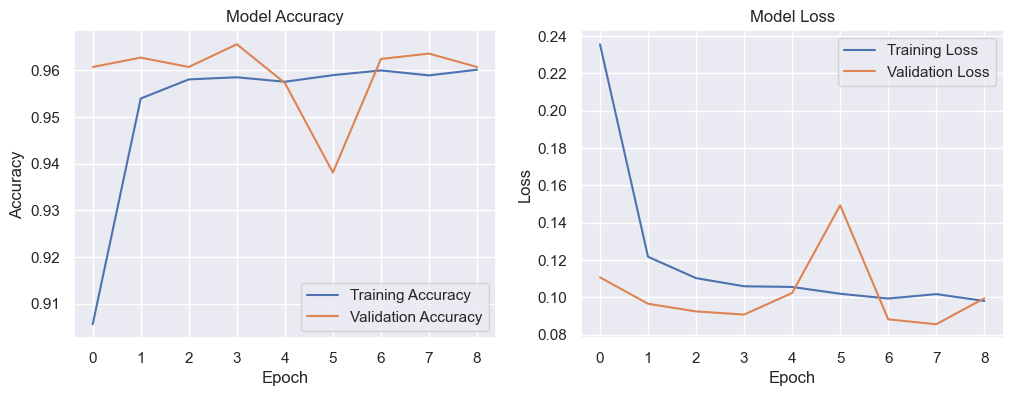

In [193]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
def plot_training_history(history):
    # Accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')
    
    plt.show()

# Call the function to plot the training history
plot_training_history(history_7)


182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
182/182 ━━━

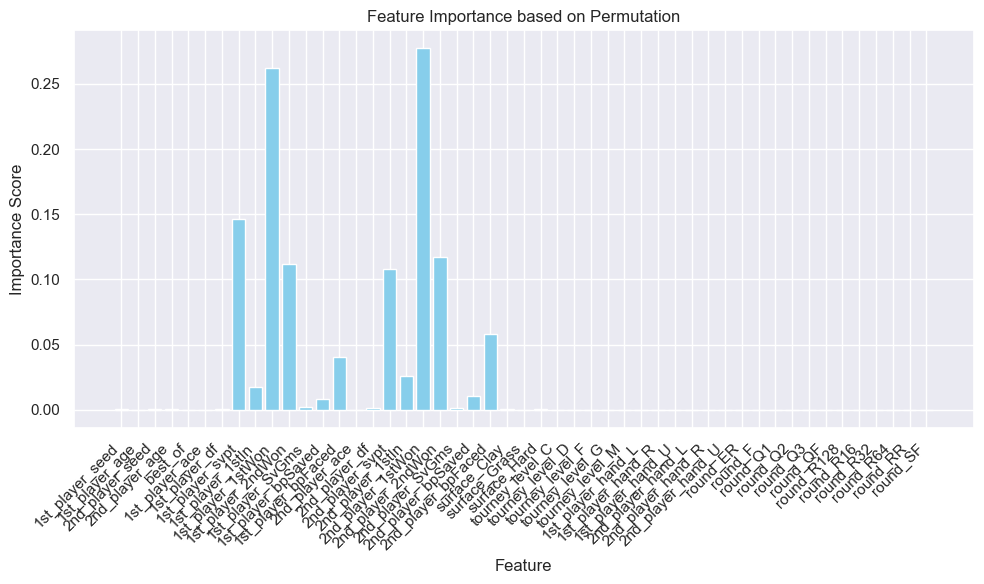

In [195]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def permutation_feature_importance(model, X, y, n_repeats=10):
    """
    Calculate permutation feature importance for a given model and dataset.
    
    Parameters:
        model: Trained model with a `predict` method.
        X: Feature matrix (Pandas DataFrame or numpy array).
        y: True labels (numpy array).
        n_repeats: Number of times to permute each feature.
        
    Returns:
        Dictionary of feature importances with feature names as keys.
    """
    # Convert X to numpy array if it's a DataFrame, and get feature names
    if isinstance(X, pd.DataFrame):
        feature_names = X.columns
        X = X.values
    else:
        feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

    # Calculate baseline accuracy with the original data
    baseline_accuracy = accuracy_score(y, (model.predict(X) > 0.5).astype(int))
    importances = {}

    # Loop over each feature column
    for i in range(X.shape[1]):
        permuted_accuracies = []
        
        # Repeat shuffling and calculate accuracy drops
        for _ in range(n_repeats):
            X_permuted = X.copy()
            np.random.shuffle(X_permuted[:, i])  # Shuffle the i-th column only
            permuted_accuracy = accuracy_score(y, (model.predict(X_permuted) > 0.5).astype(int))
            permuted_accuracies.append(permuted_accuracy)
        
        # Importance is the drop in accuracy due to shuffling
        feature_importance = baseline_accuracy - np.mean(permuted_accuracies)
        importances[feature_names[i]] = feature_importance

    return importances

# Assuming `X_test` is a DataFrame and `y_test` are your test data and labels
importances = permutation_feature_importance(model_7_1, X_test, y_test, n_repeats=5)

# Display feature importances
for feature, importance in sorted(importances.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: Importance = {importance:.4f}")

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(importances.keys(), importances.values(), color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance based on Permutation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- Third Model: Hyperparameter Tuning and Cross Validation

In [201]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Custom wrapper class for Keras model
class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.01, num_hidden_layers=1, num_neurons=32, epochs=50, batch_size=10):
        self.learning_rate = learning_rate
        self.num_hidden_layers = num_hidden_layers
        self.num_neurons = num_neurons
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(self.num_neurons, input_dim=X_train.shape[1], activation='relu'))
        for _ in range(self.num_hidden_layers - 1):
            model.add(Dense(self.num_neurons, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))  # Change output layer for multi-class
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def predict_proba(self, X):
        return self.model.predict(X)

# Prepare your data
X = df_no_outliers.drop(columns=['winner'])
y = df_no_outliers['winner']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'num_hidden_layers': [1, 2, 3],
    'num_neurons': [32, 64, 128],
    'batch_size': [10, 20],
    'epochs': [50, 100]
}

# Initialize GridSearchCV
grid = GridSearchCV(estimator=KerasClassifierWrapper(), param_grid=param_grid, n_jobs=-1, cv=3)

# Perform grid search
grid_result = grid.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_result.best_params_)
print("Best Cross-Validation Accuracy:", grid_result.best_score_)

# Use the best model to make predictions
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy with Tuned Model:", accuracy)


Best Parameters: {'batch_size': 10, 'epochs': 50, 'learning_rate': 0.001, 'num_hidden_layers': 1, 'num_neurons': 32}
Best Cross-Validation Accuracy: nan
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step
Test Set Accuracy with Tuned Model: 0.9598761893843861


Epoch 1/50
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8680 - loss: 0.3209 - val_accuracy: 0.9538 - val_loss: 0.1128
Epoch 2/50
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9628 - loss: 0.0963 - val_accuracy: 0.9575 - val_loss: 0.0973
Epoch 3/50
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9680 - loss: 0.0814 - val_accuracy: 0.9614 - val_loss: 0.0945
Epoch 4/50
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9675 - loss: 0.0797 - val_accuracy: 0.9587 - val_loss: 0.0896
Epoch 5/50
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9679 - loss: 0.0783 - val_accuracy: 0.9577 - val_loss: 0.0910
Epoch 6/50
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9675 - loss: 0.0788 - val_accuracy: 0.9592 - val_loss: 0.0916
Epoch 7/50
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9683 - loss: 0.0771 - val_accuracy: 0.9575 - val_loss: 0.0971
Epoch 8/50
1629/1629 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9678 - loss: 0.076

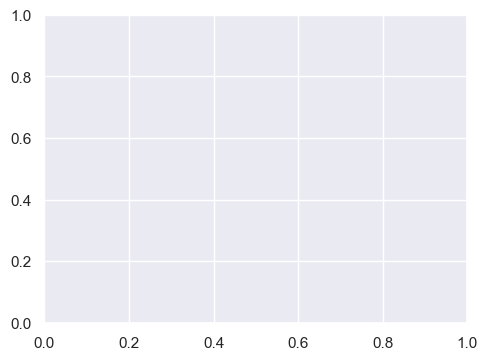

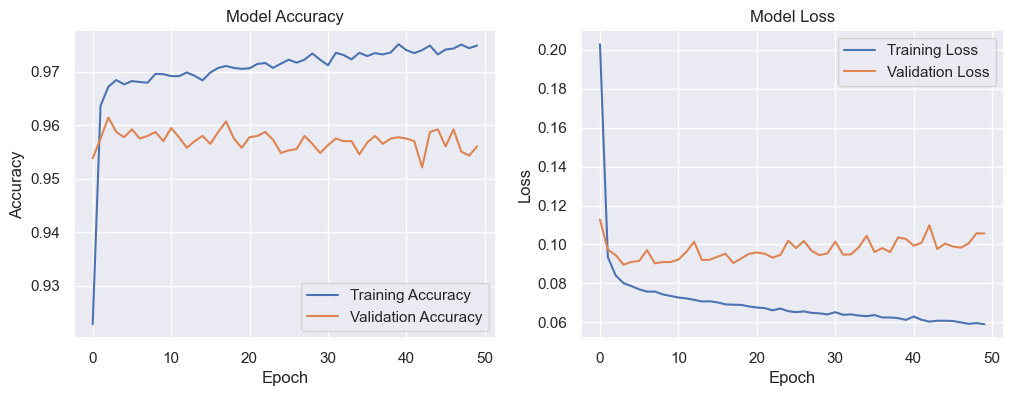

In [205]:
import matplotlib.pyplot as plt

# Define a function to build and train the best model again
def build_and_train_best_model(best_params, X_train, y_train, X_val, y_val):
    # Rebuild the best model with the selected hyperparameters
    model = Sequential()
    model.add(Dense(best_params['num_neurons'], input_dim=X_train.shape[1], activation='relu'))
    for _ in range(best_params['num_hidden_layers'] - 1):
        model.add(Dense(best_params['num_neurons'], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=best_params['learning_rate'])
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    # Train and capture history
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=best_params['epochs'],
        batch_size=best_params['batch_size'],
        verbose=1
    )
    
    return model, history

# Function to plot training and validation accuracy and loss
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')
    
    plt.show()

# Train the best model again to get history
X_train_scaled, X_val_scaled, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)
best_params = grid_result.best_params_

best_model, history = build_and_train_best_model(best_params, X_train_scaled, y_train, X_val_scaled, y_val)

# Plot the training history
plot_training_history(history)


## <b>H. Evaluation of the Predictions</b>
Let's dive into the comparison of the best individual models optimized (by hyperparameter tuning) for tennis match outcome prediction. (It's worth noting that while the Neural Network merges as the most effective model for training data, the Logistic Regression shines as the superior choice for testing data within the refined datasets.)

The ranking sequence from the highest accuracy to the lowest in the refined data:   

- **Machine Learning Accuracy Table:**

|**No.**| **Machine Learning**                     | **Accuracy Score**                                                                                         |
|-------|---------------------------------|-----------------------------------------------------------------------------------------------------|
|1. | Neural Network (NN)                   | $0.9671595692634583$                                                     |
|2. | Logistic Regression                | $0.9569365177659878$                                         |
|3. | XGBoost               | $0.9558486334499322$                                                  |
|4. | Random Forest Classifier               | $0.9475974493296959$                                                  |



- **Tenis Match Outcome Prediction for Each Machine Learning Model**   
*Jannik Sinner (ITA/206173) vs Carlos Alcaraz (ESP/207989)*
  |**No.**| **Machine Learning**                     | **Winning Probability**                                                                                         |
|-------|---------------------------------|-----------------------------------------------------------------------------------------------------|
|1. | Neural Network (NN)                   |                                                      |
|2. | Logistic Regression                | $0.1961236 : 0.8038764$                                         |
|3. | XGBoost               | $0.07350707 : 0.9264929 $                                                  |
|4. | Random Forest Classifier               | $0.48224313 : 0.51775687$                                                  |

- **Additional Mathematical Methods:**
  |**No.**| **Machine Learning**                     | **Winning Probability**                                                                                         |
|-------|---------------------------------|-----------------------------------------------------------------------------------------------------|
|1. | Glicko-2 Rating System                 | $0.5138 : 0.4862$                                                     |

After observing the winning probability, we can see the difference result between the machine learning system and the mathematical mathod. All of the machine learning models are predicting that Carlos Alcaraz (Player 2) will win the match-up with Jannik Sinner (Player 1) by variety percentages. This variation of percentage can be happen since each model has their own way of workflow in predicting the winner. While, the mathematical method predicts that Jannik Sinner will barely win against Carlos Alcaraz. This condition can be happen since there are several aspects that accounts in mathematical method but not included in the calculation of machine learning system. Those aspect that only take part in the calculation of mathematical method are court surface effect, fatigue effect, and tournament weights. Therefore, it makes sense that the result will different between the machine learning system and mathematical method. 

## <b>I. Conclusion </b>

After running the machine learning system, we can conclude that our hyphotesis as stated before is correct. There are five aspects that always been the top 5 features importance for all of the modes. Table below will explain the top 5 features importance to win a tennis match.
- **Features Importance**
  |**No.**| **Feature Importance**                     | **Reason**                                                                                         |
|-------|---------------------------------|-----------------------------------------------------------------------------------------------------|
|1. | Break Point Faced                   |                    A critical metric **indicating the pressure a player faces during a match**. Reflects how well a player handles high-pressure situations.                                  |
|2. | Break Point Saved                | **Represents the player's defensive capability to turn around challenging scenarios**. Key to maintaining momentum.                                      |
|3. | First-Serve Point Won               | **Indicates the player's ability to capitalize on their first serve**, crucial for dictating match tempo.                                                  |
|4. | Second-Serve Point Won               | **Measures performance under pressure, especially when the first serve fails**. Highlights resilience and adaptability.                                                 |
|5. | Serve Point               |**A composite measure of the player's effectiveness during their own service games**. Reflects overall control and dominance on serve.                                                 |

Based on this table, the coach should focus on improving the player’s resilience in high-pressure situations, especially around break points. Emphasis should be placed on strategies to reduce the frequency of Break Points Faced and enhance the player's ability to save break points, as these metrics reflect the player’s ability to manage stressful moments and maintain momentum. Additionally, the coach should work on increasing the player's effectiveness on first and second serves to maximize First-Serve Point Won and Second-Serve Point Won, which are critical for controlling the match tempo and adaptability under pressure. Focusing on improving the overall Serve Point metric will also be crucial, as it reflects the player's dominance and control in their service games, which is essential for sustaining performance throughout matches.